+## Please follow the below structure while attempting the hackathon, make sure to submit only one jupyter file with all the models, and you can always mention your best model by giving it the header as 'Best Model'.

## Please make sure to maintain the clarity of analysis in the notebook with proper headers and inisghts/inferences, so that it can be interpretable 


## Please follow the same format as mentioned below, as you will be evaluated basis on your Jupyter Notebook for L2 selection.

## Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[15,8]
import warnings 
warnings.filterwarnings("ignore")
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, make_scorer
from sklearn.preprocessing import LabelBinarizer,OrdinalEncoder

In [4]:
train=pd.read_csv('~/Documents/hackathon/Data_Train.csv')
test=pd.read_csv('~/Documents/hackathon/Data_Test.csv')

In [5]:
train.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,...,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee,Loan/No Loan
0,95074,421802,II,>10yrs,Vfied,633600.00,MOR??AGE,0,0,GLENDALE NISSAN,...,fully paid,California,17,58598.0,3 years,31216.05,debt consolidation,I,0.0,0
1,134131,3964312,IV,7yrs,Source Verified,85483.20,REN?,0,0,Business Teacher,...,whole,NC,15,18924.0,5 years,11660.49,debt consolidation,I,0.0,0
2,92602,4247560,III,<1yr,Source Verified,79200.00,REN?,0,0,driver,...,whole,Florida,7,15604.0,5 years,5637.87,major purchase,I,0.0,0
3,22591,197179,III,<1yr,Vfied,61600.00,REN?,0,0,AvePoint,...,fully paid,NewJersey,9,22410.0,3 years,15607.17,major purchase,I,0.0,1
4,125060,4646684,V,2yrs,Source Verified,68053.92,REN?,0,0,Lead Tester,...,fully paid,LA,10,36022.0,5 years,27472.86,debt consolidation,I,0.0,0


In [6]:
train.tail()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,...,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee,Loan/No Loan
87495,120884,4535984,II,>10yrs,Not Vfied,75680.00,REN?,0,0,Engineer Support II,...,whole,MI,12,32702.0,3 years,10012.05,debt consolidation,I,0.0,0
87496,33259,2624710,IV,3yrs,Source Verified,90423.52,REN?,0,0,Dental Hygienist,...,whole,MA,23,32204.0,5 years,24921.54,debt consolidation,I,0.0,0
87497,102153,5966919,II,>10yrs,Source Verified,91520.00,MOR??AGE,0,0,Interface Coordinator,...,fully paid,CT,8,29050.0,3 years,14517.90,debt consolidation,I,0.0,0
87498,115343,2630667,III,1yrs,Source Verified,61600.00,MOR??AGE,0,0,PARTS CLERK,...,whole,PA,11,24900.0,3 years,8454.24,debt consolidation,I,0.0,0
87499,104968,6637289,III,2yrs,Vfied,NaN,REN?,0,0,Outside sales rep,...,whole,California,7,21746.0,5 years,8717.58,debt consolidation,I,0.0,0


In [7]:
test.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,...,Sub GGGrade,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee
0,198980,1773284,II,2yrs,Source Verified,140800.00,OWN,0,0,processor,...,17,fully paid,California,23,33532.0,3 years,15755.94,major purchase,I,0.0
1,167688,5298273,II,>10yrs,Vfied,146080.00,MOR??AGE,0,0,Speech Language Pathologist,...,19,whole,Florida,17,149234.0,5 years,68237.55,debt consolidation,I,0.0
2,198768,189781,VI,>10yrs,Vfied,202222.24,MOR??AGE,0,0,Raytheon,...,37,whole,NM,15,70218.0,5 years,66272.76,debt consolidation,I,0.0
3,192564,1530906,II,>10yrs,Vfied,105600.00,MOR??AGE,1,0,Computer/Network Technician,...,19,fully paid,DE,18,79182.0,3 years,15595.20,credit card,I,0.0
4,151199,4410316,III,4yrs,Not Vfied,151360.00,MOR??AGE,0,0,NDE Tech,...,25,fully paid,Florida,7,13612.0,3 years,8850.96,debt consolidation,I,0.0


In [8]:
test.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,...,Sub GGGrade,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee
0,198980,1773284,II,2yrs,Source Verified,140800.00,OWN,0,0,processor,...,17,fully paid,California,23,33532.0,3 years,15755.94,major purchase,I,0.0
1,167688,5298273,II,>10yrs,Vfied,146080.00,MOR??AGE,0,0,Speech Language Pathologist,...,19,whole,Florida,17,149234.0,5 years,68237.55,debt consolidation,I,0.0
2,198768,189781,VI,>10yrs,Vfied,202222.24,MOR??AGE,0,0,Raytheon,...,37,whole,NM,15,70218.0,5 years,66272.76,debt consolidation,I,0.0
3,192564,1530906,II,>10yrs,Vfied,105600.00,MOR??AGE,1,0,Computer/Network Technician,...,19,fully paid,DE,18,79182.0,3 years,15595.20,credit card,I,0.0
4,151199,4410316,III,4yrs,Not Vfied,151360.00,MOR??AGE,0,0,NDE Tech,...,25,fully paid,Florida,7,13612.0,3 years,8850.96,debt consolidation,I,0.0


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   87500 non-null  int64  
 1   Asst_Reg             87500 non-null  int64  
 2   GGGrade              87500 non-null  object 
 3   Experience           87500 non-null  object 
 4   Validation           87500 non-null  object 
 5   Yearly Income        81925 non-null  float64
 6   Home Status          87500 non-null  object 
 7   Unpaid 2 years       87500 non-null  int64  
 8   Already Defaulted    87500 non-null  int64  
 9   Designation          86086 non-null  object 
 10  Debt to Income       84011 non-null  float64
 11  Postal Code          86111 non-null  float64
 12  Lend Amount          87500 non-null  float64
 13  Deprecatory Records  87500 non-null  int64  
 14  Interest Charged     87500 non-null  float64
 15  Usage Rate           87500 non-null 

In [10]:
train.describe()

,ID,Asst_Reg,Yearly Income,Unpaid 2 years,Already Defaulted,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,Account Open,Total Unpaid CL,Unpaid Amount,Due Fee,Loan/No Loan
count,87500.000000,8.750000e+04,8.192500e+04,87500.000000,87500.000000,84011.000000,86111.000000,87500.000000,87500.000000,87500.000000,87500.000000,87500.000000,8.750000e+04,87500.000000,87500.000000,87500.00000,8.331400e+04,8.264800e+04,87500.000000,87500.000000
mean,83946.253509,3.798914e+06,1.348596e+05,0.332937,0.005726,30.942660,51155.385491,25920.535680,0.202400,16.518375,95.517348,0.670640,2.363895e+05,39.461697,22.024891,12.77944,5.326864e+04,2.955649e+04,0.316407,0.188709
std,36100.102950,2.289038e+06,9.882473e+04,0.876080,0.083505,14.079813,31211.229930,14433.837213,0.646414,4.902011,40.554035,0.959572,2.550568e+05,391.919578,6.452697,5.37116,5.325551e+04,3.745625e+04,3.546087,0.391279
min,21560.000000,2.484700e+04,8.800000e+03,0.000000,0.000000,0.000000,1000.000000,1710.000000,0.000000,8.000000,0.000000,0.000000,0.000000e+00,0.000000,11.000000,2.00000,3.320000e+02,0.000000e+00,0.000000,0.000000
25%,52616.750000,1.483874e+06,8.324659e+04,0.000000,0.000000,20.428800,22900.000000,15048.000000,0.000000,12.310000,66.048000,0.000000,5.173493e+04,0.000000,17.000000,9.00000,2.324000e+04,1.144674e+04,0.000000,0.000000
50%,83900.000000,4.132010e+06,1.144000e+05,0.000000,0.000000,30.139200,47700.000000,23940.000000,0.000000,16.490000,97.008000,0.000000,1.388062e+05,0.000000,21.000000,12.00000,3.967400e+04,2.089278e+04,0.000000,0.000000
75%,115261.250000,5.952909e+06,1.601600e+05,0.000000,0.000000,40.908000,80200.000000,34200.000000,0.000000,20.770000,126.592000,1.000000,3.534755e+05,0.000000,26.000000,16.00000,6.640000e+04,3.644908e+04,0.000000,0.000000
max,146559.000000,7.351847e+06,8.264031e+06,18.000000,6.000000,639.290400,99900.000000,59850.000000,86.000000,25.000000,1534.756000,8.000000,5.629234e+06,26308.470000,45.000000,83.00000,1.710630e+06,1.338778e+06,169.050000,1.000000


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   37500 non-null  int64  
 1   Asst_Reg             37500 non-null  int64  
 2   GGGrade              37500 non-null  object 
 3   Experience           37500 non-null  object 
 4   Validation           37500 non-null  object 
 5   Yearly Income        35075 non-null  float64
 6   Home Status          37500 non-null  object 
 7   Unpaid 2 years       37500 non-null  int64  
 8   Already Defaulted    37500 non-null  int64  
 9   Designation          36914 non-null  object 
 10  Debt to Income       35989 non-null  float64
 11  Postal Code          36889 non-null  float64
 12  Lend Amount          37500 non-null  float64
 13  Deprecatory Records  37500 non-null  int64  
 14  Interest Charged     37500 non-null  float64
 15  Usage Rate           37500 non-null 

In [12]:
test.describe()

,ID,Asst_Reg,Yearly Income,Unpaid 2 years,Already Defaulted,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,Account Open,Total Unpaid CL,Unpaid Amount,Due Fee
count,37500.000000,3.750000e+04,3.507500e+04,37500.000000,37500.000000,35989.00000,36889.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,3.750000e+04,37500.000000,37500.000000,37500.000000,3.568600e+04,3.543100e+04,37500.000000
mean,184143.867973,3.804858e+06,1.340308e+05,0.336427,0.005307,30.91903,51233.945078,25828.004160,0.200080,16.511014,95.259109,0.676640,2.353528e+05,39.484071,22.031467,12.777787,5.344820e+04,2.928066e+04,0.309792
std,21683.224387,2.284115e+06,1.000845e+05,0.887640,0.077966,13.87167,31250.428604,14402.061788,0.563137,4.912595,40.493219,0.964515,2.543097e+05,364.114581,6.481257,5.360527,5.215483e+04,3.560849e+04,3.396315
min,146560.000000,3.752200e+04,8.800000e+03,0.000000,0.000000,0.00000,1000.000000,1710.000000,0.000000,8.000000,0.000000,0.000000,0.000000e+00,0.000000,11.000000,2.000000,3.320000e+02,0.000000e+00,0.000000
25%,165341.250000,1.495828e+06,8.419400e+04,0.000000,0.000000,20.47920,22900.000000,14919.750000,0.000000,12.250000,65.532000,0.000000,5.129572e+04,0.000000,17.000000,9.000000,2.324000e+04,1.141425e+04,0.000000
50%,184257.000000,4.134010e+06,1.144000e+05,0.000000,0.000000,30.18960,47800.000000,23811.750000,0.000000,16.515000,96.492000,0.000000,1.383795e+05,0.000000,21.000000,12.000000,3.950800e+04,2.068074e+04,0.000000
75%,202869.250000,5.934898e+06,1.584000e+05,0.000000,0.000000,40.72320,80200.000000,34200.000000,0.000000,20.770000,126.764000,1.000000,3.514983e+05,0.000000,26.000000,15.000000,6.640000e+04,3.618446e+04,0.000000
max,221557.000000,7.351969e+06,8.800000e+06,18.000000,3.000000,116.50800,99900.000000,59850.000000,21.000000,25.000000,254.560000,6.000000,4.909890e+06,13900.000000,45.000000,60.000000,1.475408e+06,1.535830e+06,131.490000


In [13]:
((train.isnull().sum()/train.shape[0])*100)

ID                     0.000000
Asst_Reg               0.000000
GGGrade                0.000000
Experience             0.000000
Validation             0.000000
Yearly Income          6.371429
Home Status            0.000000
Unpaid 2 years         0.000000
Already Defaulted      0.000000
Designation            1.616000
Debt to Income         3.987429
Postal Code            1.587429
Lend Amount            0.000000
Deprecatory Records    0.000000
Interest Charged       0.000000
Usage Rate             0.000000
Inquiries              0.000000
Present Balance        0.000000
Gross Collection       0.000000
Sub GGGrade            0.000000
File Status            0.000000
State                  0.000000
Account Open           0.000000
Total Unpaid CL        4.784000
Duration               0.000000
Unpaid Amount          5.545143
Reason                 0.000000
Claim Type             0.000000
Due Fee                0.000000
Loan/No Loan           0.000000
dtype: float64

In [14]:
null_train=pd.DataFrame({'Null':train.isnull().sum(),'Null_percent':(train.isnull().sum()/train.shape[0])*100})

In [15]:
null_test=pd.DataFrame({'Null':test.isnull().sum(),'Null_percent':(test.isnull().sum()/test.shape[0]*100)})

##### columns with null values in train

In [16]:
null_train[null_train.Null_percent>0]

,Null,Null_percent
Yearly Income,5575,6.371429
Designation,1414,1.616000
Debt to Income,3489,3.987429
Postal Code,1389,1.587429
Total Unpaid CL,4186,4.784000
Unpaid Amount,4852,5.545143


##### columns with null values in test

In [17]:
null_test[null_test.Null_percent>0]

,Null,Null_percent
Yearly Income,2425,6.466667
Designation,586,1.562667
Debt to Income,1511,4.029333
Postal Code,611,1.629333
Total Unpaid CL,1814,4.837333
Unpaid Amount,2069,5.517333


In [23]:
train.dtypes

ID                       int64
Asst_Reg                 int64
GGGrade                 object
Experience              object
Validation              object
Yearly Income          float64
Home Status             object
Unpaid 2 years           int64
Already Defaulted       object
Designation             object
Debt to Income         float64
Postal Code            float64
Lend Amount            float64
Deprecatory Records     object
Interest Charged       float64
Usage Rate             float64
Inquiries               object
Present Balance        float64
Gross Collection       float64
Sub GGGrade              int64
File Status             object
State                   object
Account Open             int64
Total Unpaid CL        float64
Duration                object
Unpaid Amount          float64
Reason                  object
Claim Type              object
Due Fee                float64
Loan/No Loan             int64
dtype: object

##### Correcting incorrectly specied data types 

In [18]:
train[['GGGrade', 'Experience', 'Validation', 'Home Status',
       'File Status', 'Duration', 'Reason', 'Claim Type','Inquiries','Already Defaulted','Deprecatory Records']]=train[['GGGrade', 'Experience', 'Validation', 'Home Status',
       'File Status', 'Duration', 'Reason', 'Claim Type','Inquiries','Already Defaulted','Deprecatory Records']].astype(object)

In [24]:
train.dtypes

ID                       int64
Asst_Reg                 int64
GGGrade                 object
Experience              object
Validation              object
Yearly Income          float64
Home Status             object
Unpaid 2 years           int64
Already Defaulted       object
Designation             object
Debt to Income         float64
Postal Code            float64
Lend Amount            float64
Deprecatory Records     object
Interest Charged       float64
Usage Rate             float64
Inquiries               object
Present Balance        float64
Gross Collection       float64
Sub GGGrade              int64
File Status             object
State                   object
Account Open             int64
Total Unpaid CL        float64
Duration                object
Unpaid Amount          float64
Reason                  object
Claim Type              object
Due Fee                float64
Loan/No Loan             int64
dtype: object

## Visualising data without null values (training set)

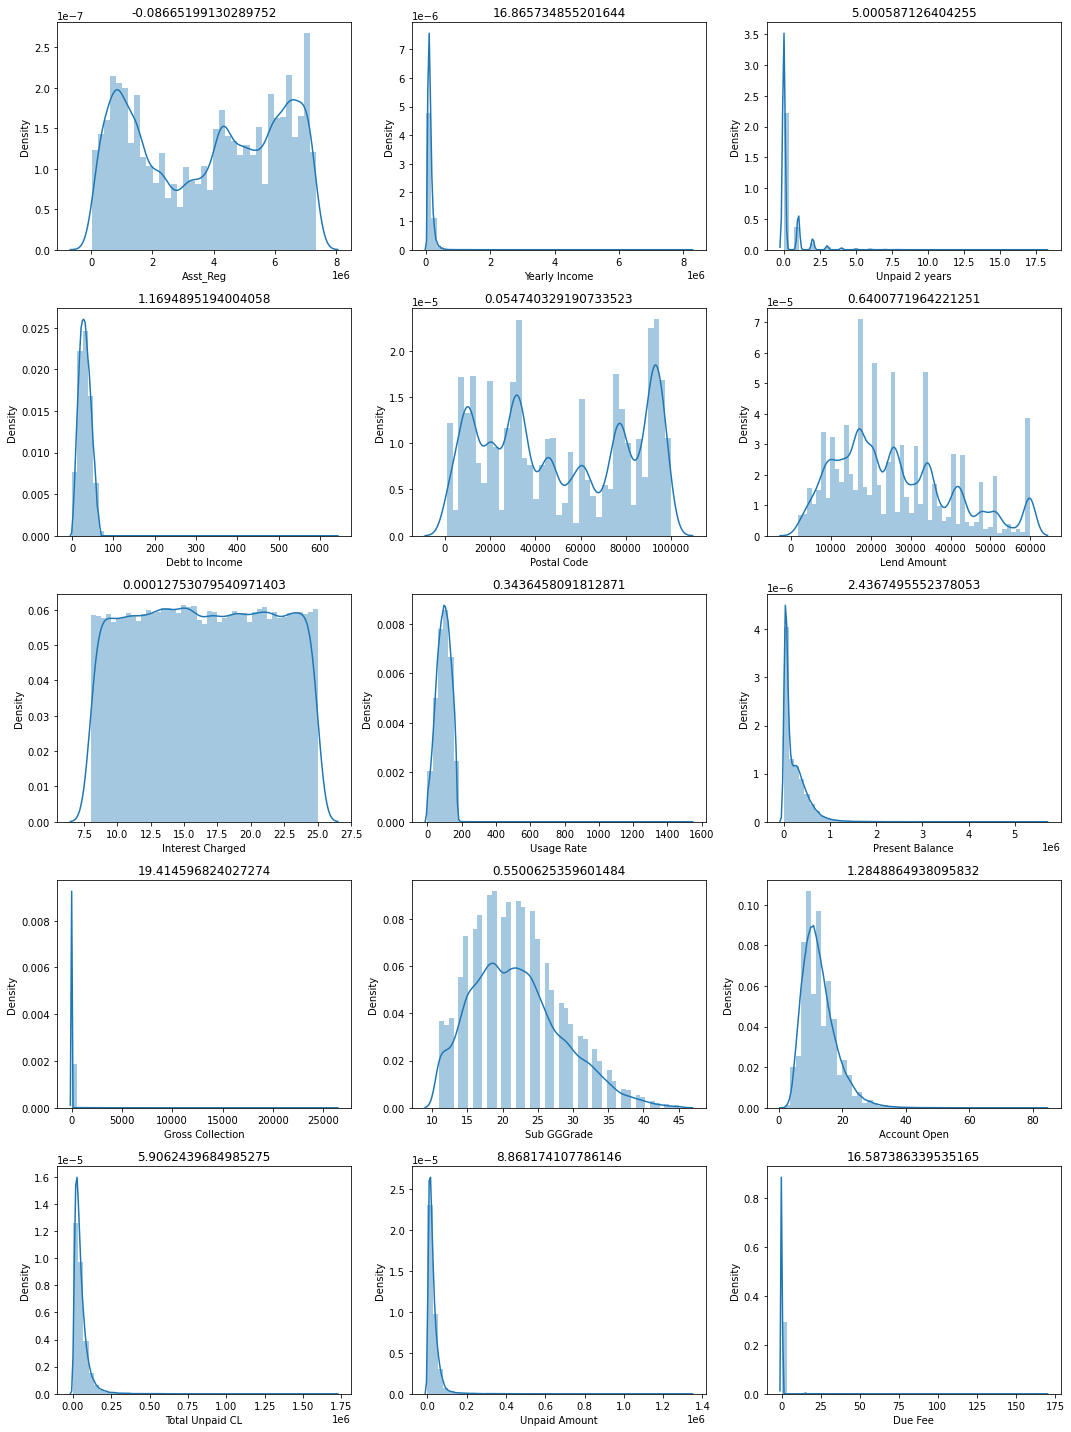

In [19]:
plt.figure(figsize=[15,20])
j=1
for i in ['Asst_Reg', 'Yearly Income', 'Unpaid 2 years', 'Debt to Income', 'Postal Code', 'Lend Amount', 'Interest Charged', 'Usage Rate',
       'Present Balance', 'Gross Collection', 'Sub GGGrade', 'Account Open',
       'Total Unpaid CL', 'Unpaid Amount', 'Due Fee']:
    plt.subplot(5,3,j)
    plt.title(train[i].skew())
    sns.distplot(train[i])
    j=j+1
plt.tight_layout()
plt.show()

## EDA INFERENCES (for numerical features)
* **Asst_Reg** -  It is negetively skewed and multi modal in nature
* **Interest Charged** - It is very close to normal skewness value i.e 0.Most of the density of customers are charged interest    rates between 8%-25% (approx).
* **Usage Rate** - Highly positively skewed, this might be due to some people who are charged with high processing fee.
* **Open Accounts** - Most  of the people have less than 20 active accounts in their name 
* **Unpaid amount & total unpaid CL** - Positively skewed
* **Due Fee** -Most of the people have 0 or nearly zero due fee, highly positively skewed
* **Yearly Income** -Positively skewed, may be because of the people that have extremely high income(outliers)
* **Debt to income** - positively skewed due to people with high debt to income score as in yearly income

## BAD DATA

* There is no bad data in numerical columns as of now #####
 

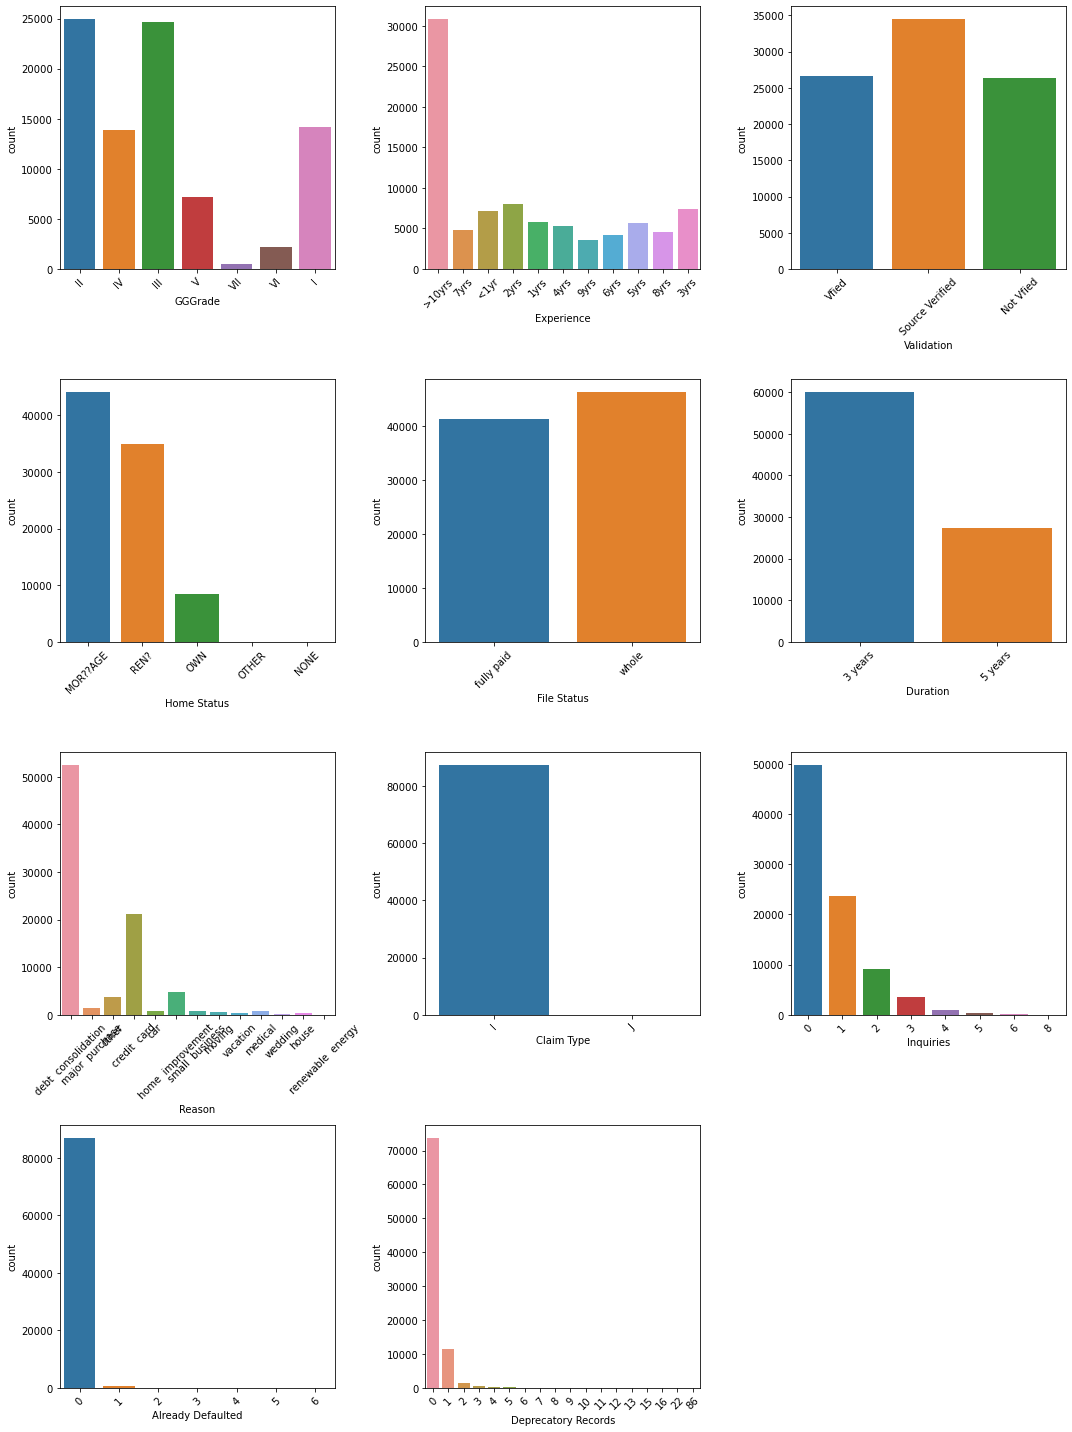

In [20]:
plt.figure(figsize=[15,20])
j=1
for i in ['GGGrade', 'Experience', 'Validation', 'Home Status',
       'File Status', 'Duration', 'Reason', 'Claim Type','Inquiries','Already Defaulted','Deprecatory Records']:
    plt.subplot(4,3,j)
    plt.xticks(rotation=45)
    sns.countplot(train[i])
    j=j+1
plt.tight_layout()
plt.show()

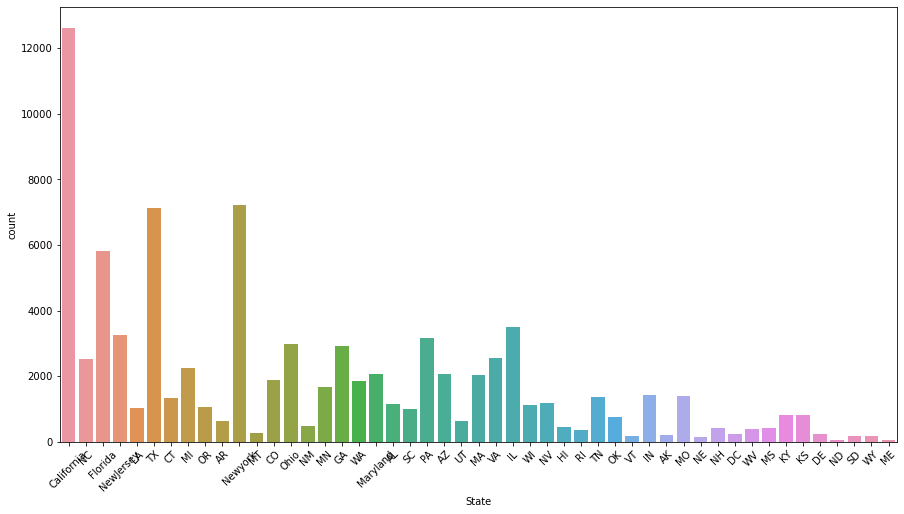

In [21]:
plt.xticks(rotation=45)
sns.countplot(train['State'],)
plt.show()

## EDA Inferences (catergorical data)
* **Already Defaulted** -Most of the people have not defaulted on their previous loan 
* **GGGrade**-Most of the people have a GG Grade of III or II
* **Experience** - People with experience of more tha 10 years have the maximum density
* **Validation** - More than 50 % of the people are verified , there are 3 categories in validation column, but vfied and source verified seems to be same categories which may mean verified, this should be considered as bad data and would be rectified in the further  steps
* **Home Status** - Most of the people applying for a loan are living in a mortgaged or rented home. Here MORT??AGE means MORTGAGE and REN? mean RENT/RENTED , thi sis considered to be bad data and would be rectified in the further steps
* **File status** - It has two categories whole and fully paid which appears to be ambigous as of now
* **Reason** - Most of the people are requesting loan for the purpose of debt consolidation, which implies they are taking loans to repay other loan or credit .The second highest reason(density wise) is credit card 
* **Claim Type** - Most of the people requesting loan has claim type as I ,that is individual account , J here stands for joint account 
* **Inquiries** - Amoungst people who've requested for loans most of them have not initiated any inquiry for a loan in last 6 months
* **Already Defaulted** - Most of the people requesting loans have not defaulted in any loan taken previosly\
* **Deprectory records** - Most of the people have a entry less than 5, I plan to make bins out of this category as low risk , medium risk and high risk if needed later. 


## BAD DATA
* There is some bad data in the column Home Status such as  'MOR??AGE' and 'REN?'
* vfied and source verified seems to of the same meaning in validation column

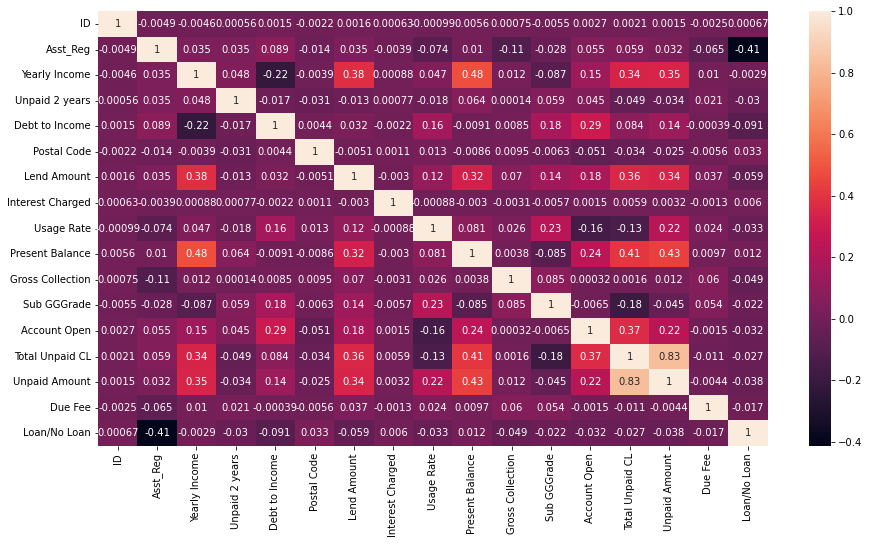

In [25]:
sns.heatmap(train.corr(),annot=True)
plt.show()

In [8]:
#This is to check which variables are collinear among themselves. But not with the target because it is categorical in nature

##### NO significant correlation seen as of now

## 1 Data Cleaning

##### Replacing bad data with correct data

In [26]:
train['Home Status']=train['Home Status'].replace({'REN?':'RENT','MOR??AGE':'MORTGAGE'})

In [27]:
test['Home Status']=test['Home Status'].replace({'REN?':'RENT','MOR??AGE':'MORTGAGE'})

In [28]:
train['Validation']=train['Validation'].replace('Vfied','Source Verified')

In [29]:
test['Validation']=test['Validation'].replace('Vfied','Source Verified')

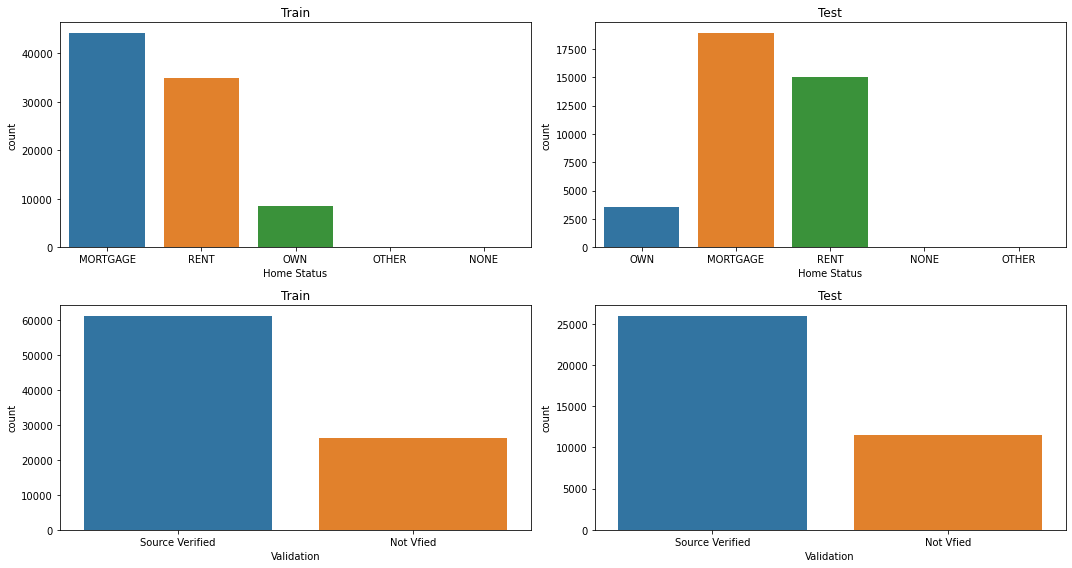

In [30]:
plt.subplot(2,2,1)
plt.title('Train')
sns.countplot(train['Home Status'])
plt.subplot(2,2,2)
plt.title('Test')
sns.countplot(test['Home Status'])
plt.subplot(2,2,3)
plt.title('Train')
sns.countplot(train['Validation'])
plt.subplot(2,2,4)
plt.title('Test')
sns.countplot(test['Validation'])
plt.tight_layout()
plt.show()

## 2 Exploratory Data Analyis, Feature Engineering and Null Value Treatment

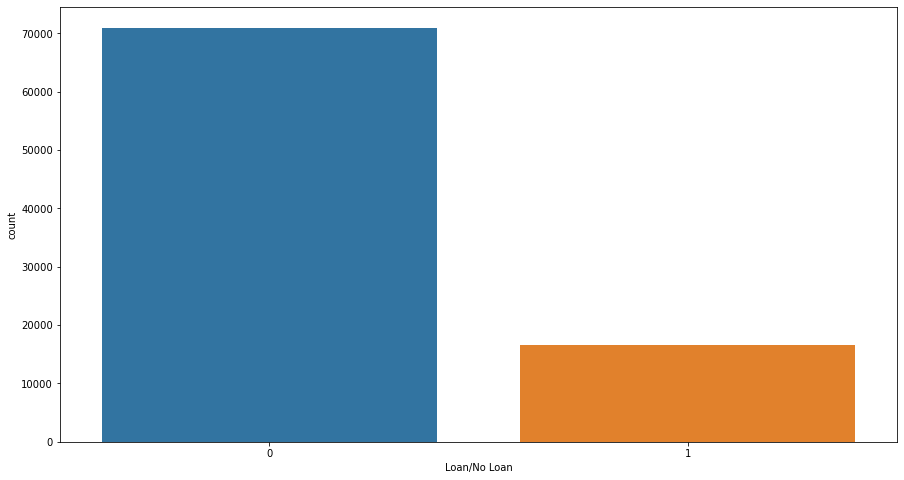

In [31]:
sns.countplot(train['Loan/No Loan'])
plt.show()

##### Target variable is unbalanced

##### Analysing both train and test data combined for null value treatment 


























In [32]:
combined_data=pd.concat([train.drop('Loan/No Loan',axis=1).reset_index(drop=True),test.reset_index(drop=True)],axis=0)

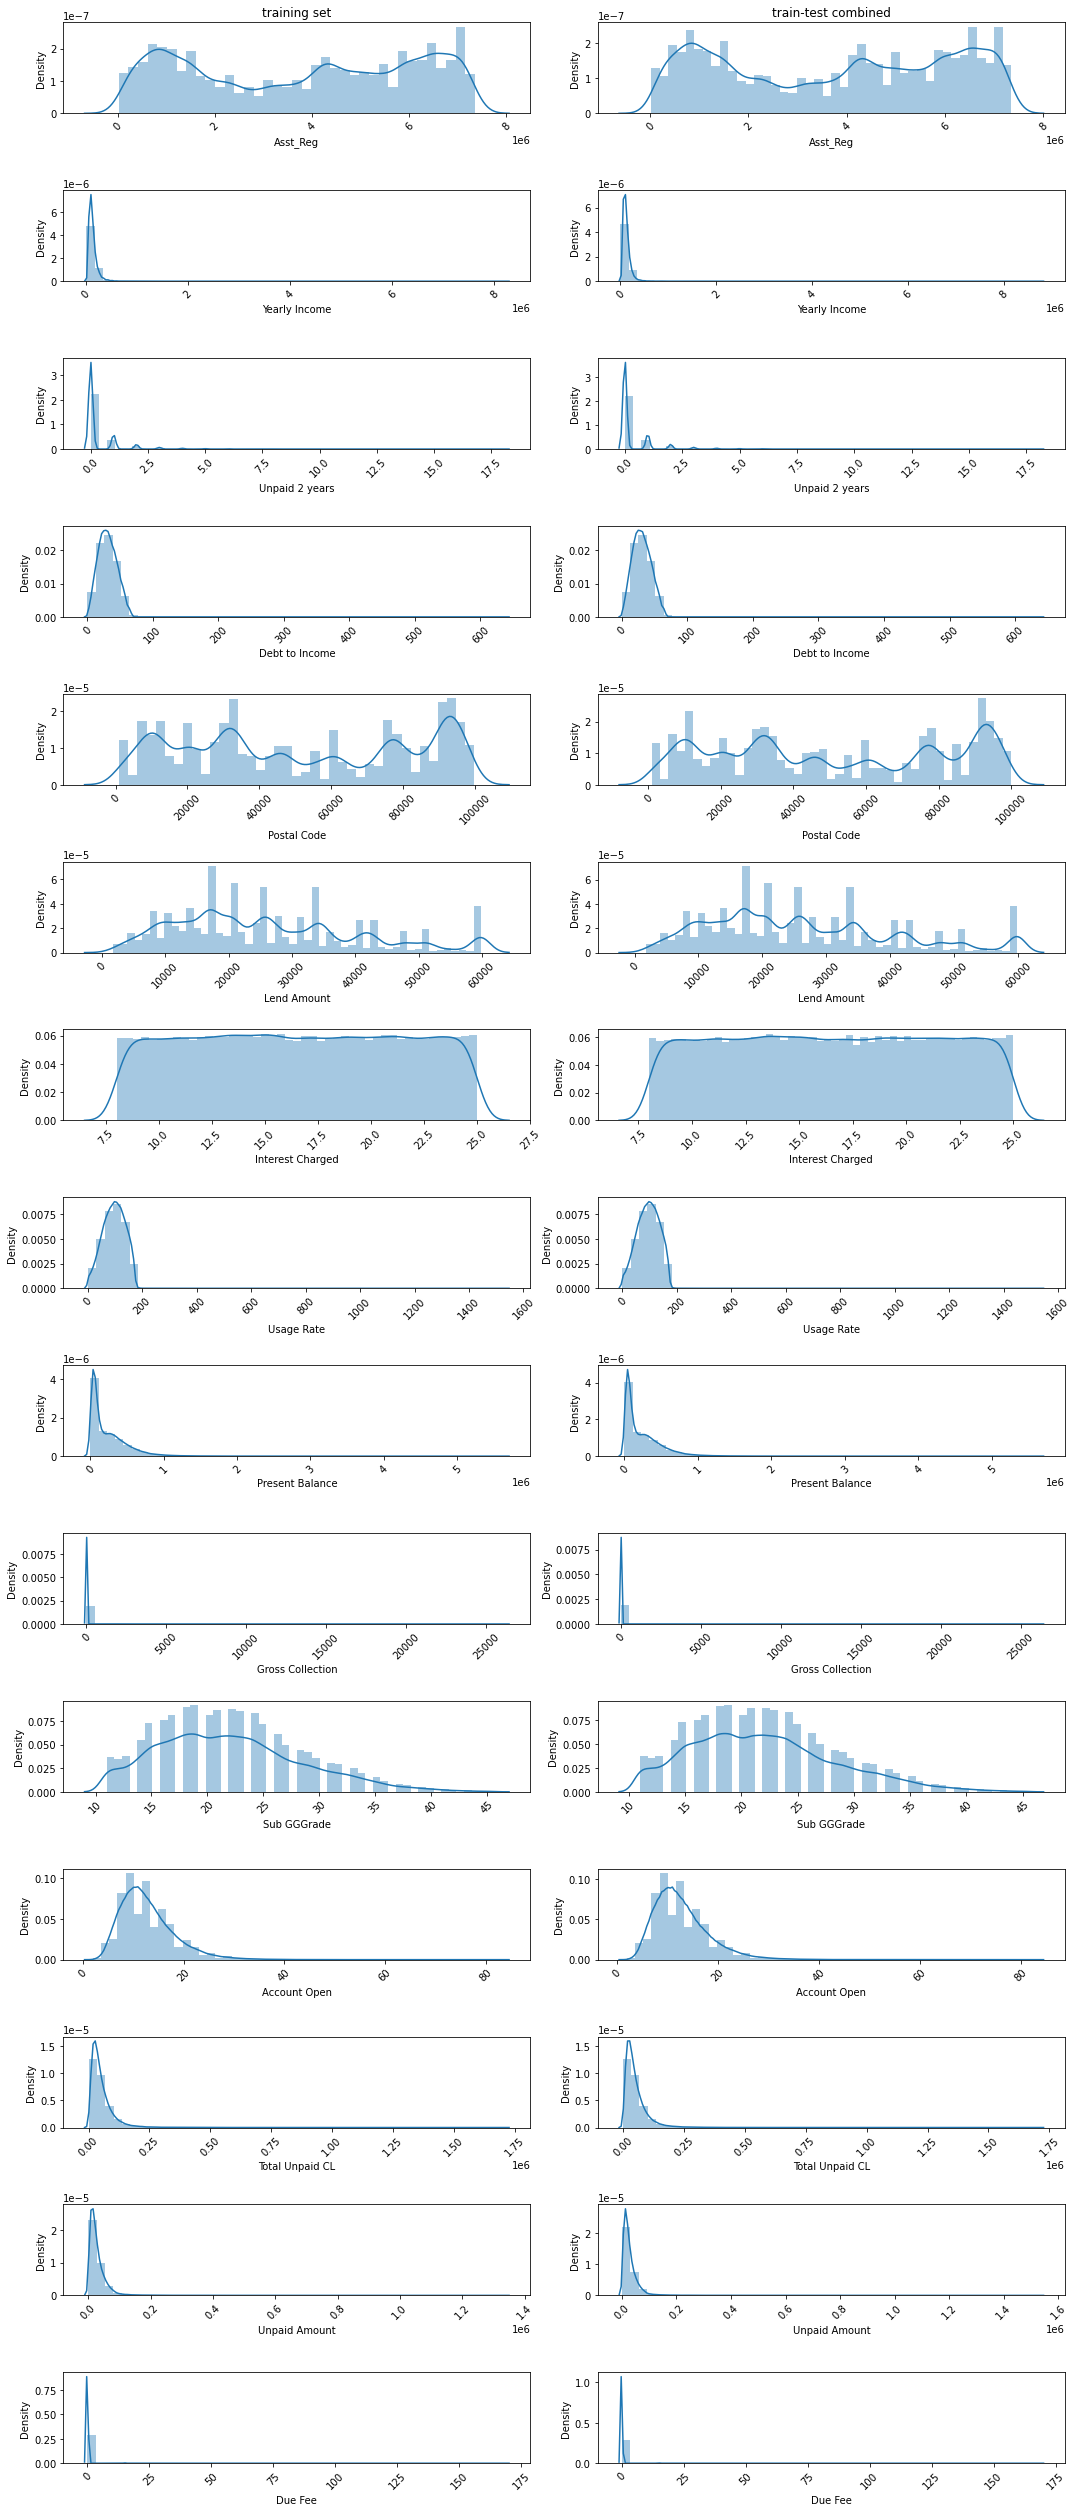

In [33]:
plt.figure(figsize=[15,35])
j=1
plt.subplot(15,2,1)
plt.title('training set')
plt.subplot(15,2,2)
plt.title('train-test combined')
for i in ['Asst_Reg', 'Yearly Income', 'Unpaid 2 years', 'Debt to Income', 'Postal Code', 'Lend Amount', 'Interest Charged', 'Usage Rate',
       'Present Balance', 'Gross Collection', 'Sub GGGrade', 'Account Open',
       'Total Unpaid CL', 'Unpaid Amount', 'Due Fee']:
    plt.subplot(15,2,j)
    sns.distplot(train[i])
    plt.xticks(rotation=45)
    j=j+1
    plt.subplot(15,2,j)
    sns.distplot(combined_data[i])
    plt.xticks(rotation=45)
    j=j+1
plt.tight_layout()
plt.show()
  

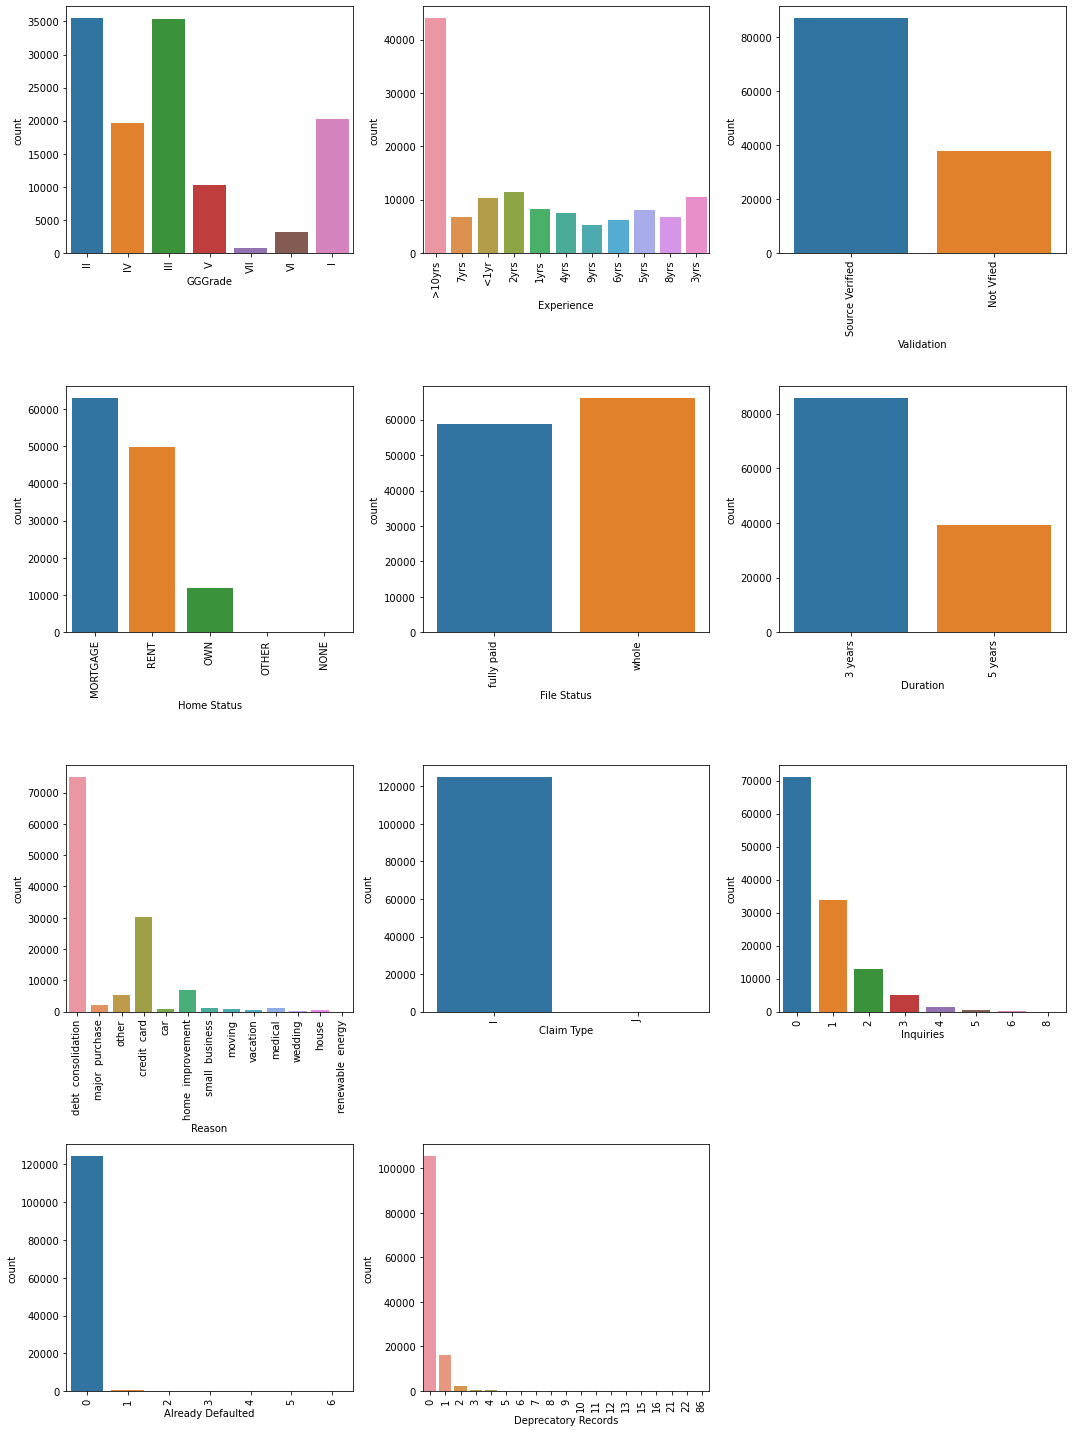

In [34]:
plt.figure(figsize=[15,20])
j=1
for i in ['GGGrade', 'Experience', 'Validation', 'Home Status',
       'File Status', 'Duration', 'Reason', 'Claim Type','Inquiries','Already Defaulted','Deprecatory Records']:
    plt.subplot(4,3,j)
    plt.xticks(rotation=90)
    sns.countplot(combined_data[i])
    j=j+1
plt.tight_layout()
plt.show()

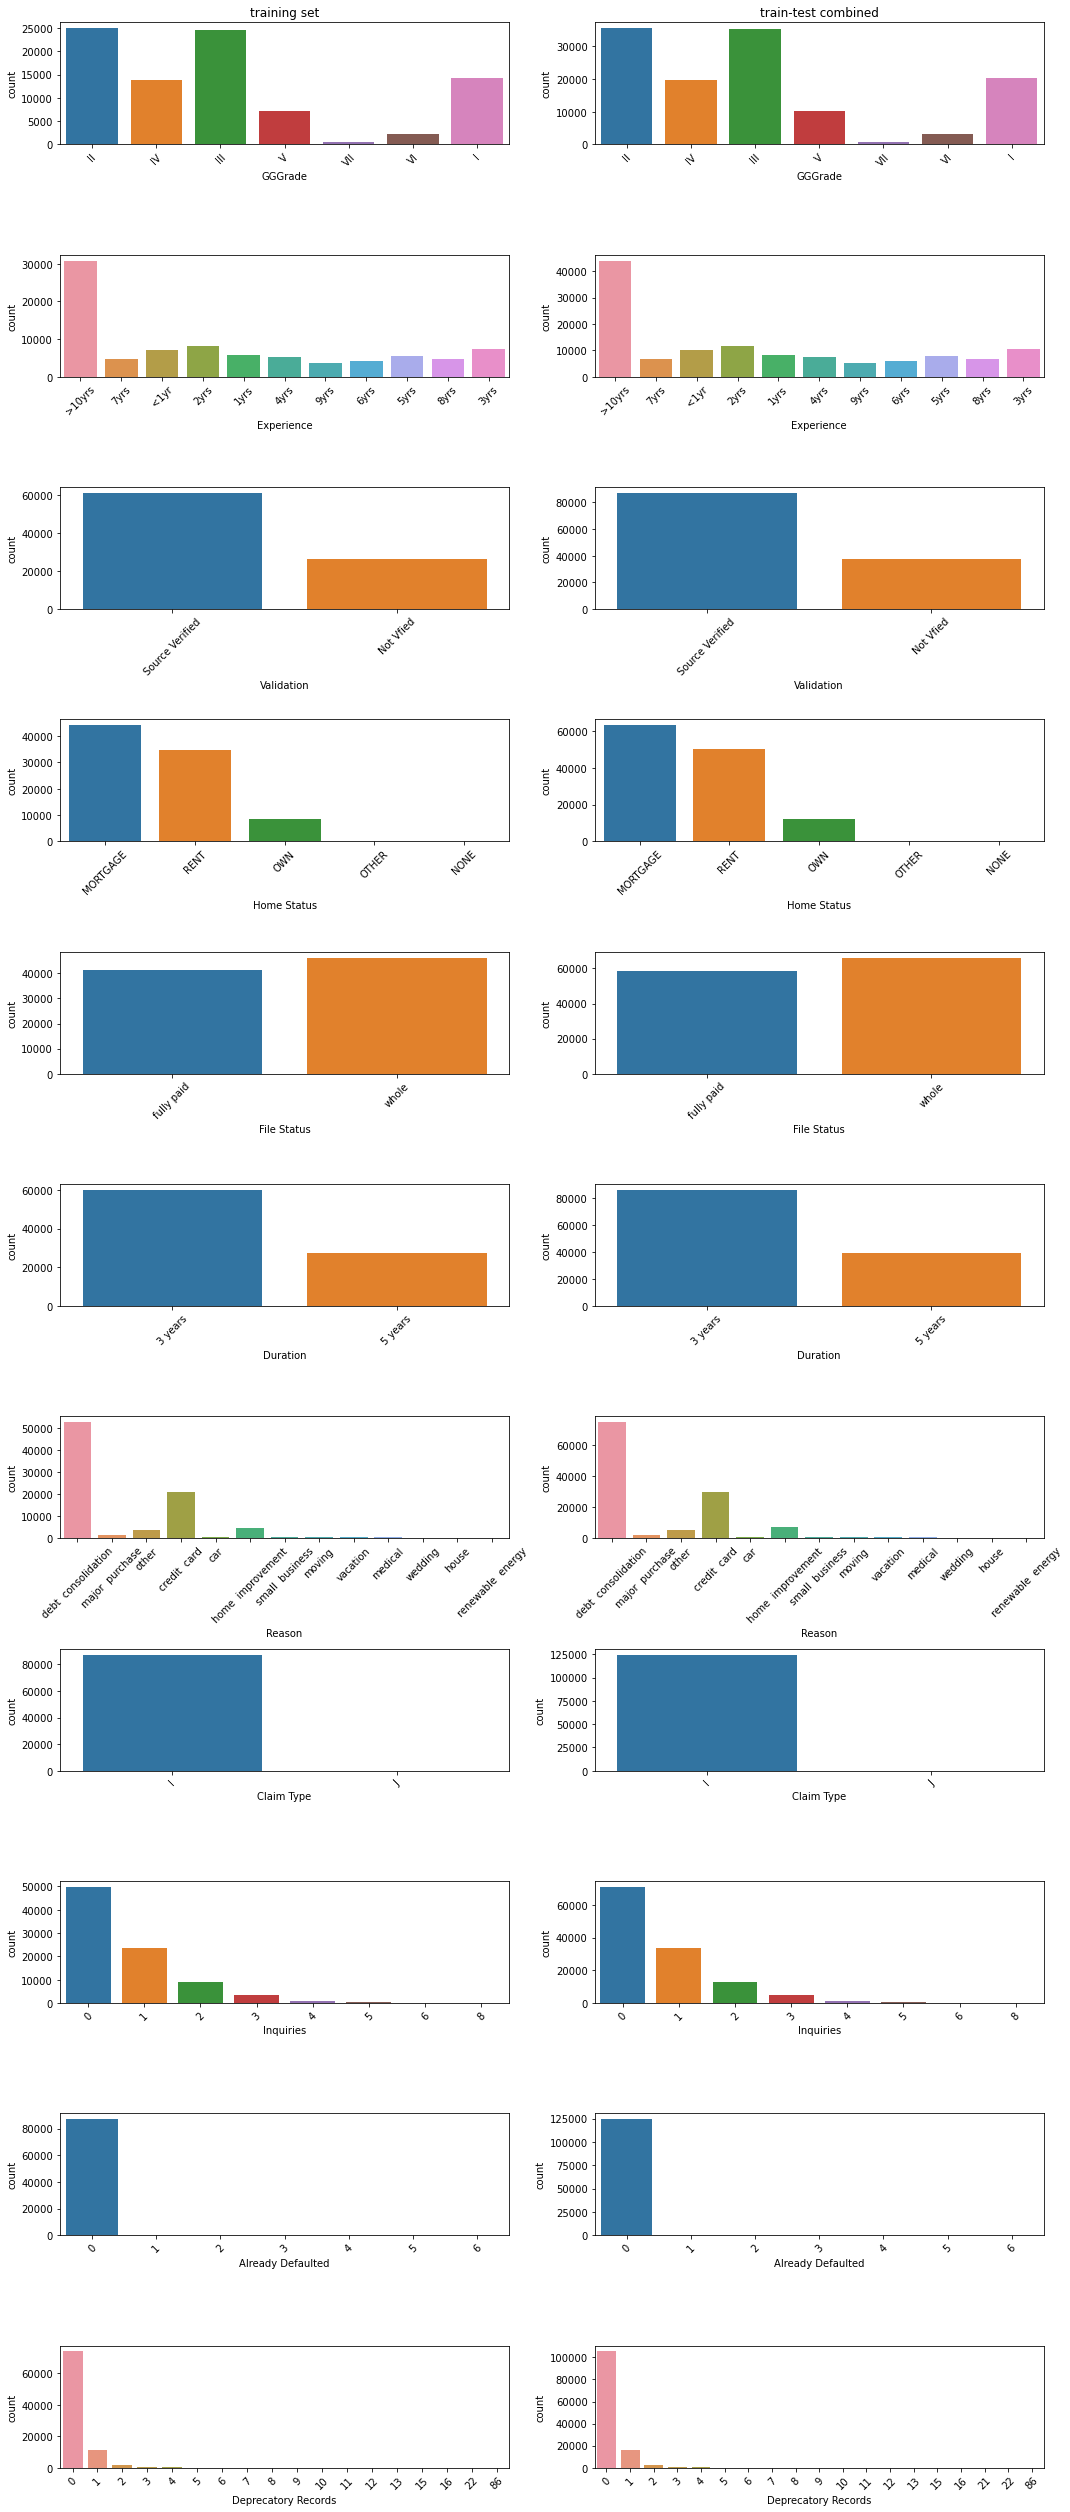

In [35]:
plt.figure(figsize=[15,35])
j=1
plt.subplot(11,2,1)
plt.title('training set')
plt.subplot(11,2,2)
plt.title('train-test combined')

for i in ['GGGrade', 'Experience', 'Validation', 'Home Status',
       'File Status', 'Duration', 'Reason', 'Claim Type','Inquiries','Already Defaulted','Deprecatory Records']:
    plt.subplot(11,2,j)
    sns.countplot(train[i])
    plt.xticks(rotation=45)
    j=j+1
    plt.subplot(11,2,j)
    sns.countplot(combined_data[i])
    plt.xticks(rotation=45)
    j=j+1
plt.tight_layout()
plt.show()

##### The trends are somewhat similar , there are slight or no changes in the inferences.

In [36]:
train['Postal Code']=train['Postal Code'].fillna(combined_data['Postal Code'].mode()[0])
test['Postal Code']=test['Postal Code'].fillna(combined_data['Postal Code'].mode()[0])

In [37]:
xtrain=train.drop('Loan/No Loan',axis=1)
ytrain=train['Loan/No Loan']

In [38]:
xtrain.drop(['Designation','ID'],axis=1,inplace=True)
test.drop(['Designation','ID'],axis=1,inplace=True)

In [53]:
train.isnull().sum()

ID                        0
Asst_Reg                  0
GGGrade                   0
Experience                0
Validation                0
Yearly Income          5575
Home Status               0
Unpaid 2 years            0
Already Defaulted         0
Designation            1414
Debt to Income         3489
Postal Code               0
Lend Amount               0
Deprecatory Records       0
Interest Charged          0
Usage Rate                0
Inquiries                 0
Present Balance           0
Gross Collection          0
Sub GGGrade               0
File Status               0
State                     0
Account Open              0
Total Unpaid CL        4186
Duration                  0
Unpaid Amount          4852
Reason                    0
Claim Type                0
Due Fee                   0
Loan/No Loan              0
dtype: int64

##### Binning Experience

In [39]:
Experience_train=[]
for i in xtrain.Experience:
    if i=='>10yrs':
        Experience_train.append('>10')
    elif i=='2yrs' or i=='<1yr'  or i=='3yrs':
        Experience_train.append('0-3')
    elif i=='4yrs' or i=='5yrs' or i=='6yrs' :
        Experience_train.append('4-6')
    else:
        Experience_train.append('7-9')

In [40]:
Experience_test=[]
for i in test.Experience:
    if i=='>10yrs':
        Experience_test.append('>10')
    elif i=='2yrs' or i=='<1yr'  or i=='3yrs':
        Experience_test.append('0-3')
    elif i=='4yrs' or i=='5yrs' or i=='6yrs' :
        Experience_test.append('4-6')
    else:
        Experience_test.append('7-9')

In [41]:
xtrain.Experience=Experience_train

In [42]:
test.Experience=Experience_test

In [43]:
States_Train=[]
for i in xtrain.State :
    if i in['WA','OR','ID','MT','WY','NV','CA','AZ','NM','CO','UT','California']:
        States_Train.append('WEST')
    elif i in ['RA','NY','NI','VT','NH','ME','MA','CT','RI','NewJersey','Ohio','Maryland']:
        States_Train.append('NORTH_EAST')
    elif i in ['ND','SD','NE','KS','MN','IA','MO','WI','IL','MI','IN','OH','Florida']:
        States_Train.append('MIDWEST')
    else :
        States_Train.append('SOUTH')

In [44]:
States_Test=[]
for i in test.State :
    if i in['WA','OR','ID','MT','WY','NV','CA','AZ','NM','CO','UT','California']:
        States_Test.append('WEST')
    elif i in ['RA','NY','NI','VT','NH','ME','MA','CT','RI','NewJersey','Ohio','Maryland']:
        States_Test.append('NORTH_EAST')
    elif i in ['ND','SD','NE','KS','MN','IA','MO','WI','IL','MI','IN','OH','Florida']:
        States_Test.append('MIDWEST')
    else :
        States_Test.append('SOUTH')

In [45]:
xtrain.State=States_Train
test.State=States_Test

In [46]:
Inquiries_train=[]
for i in xtrain['Inquiries']:
    if i==0:
        Inquiries_train.append('no queries')
    elif i=='1' or i=='2' or i=='3':
        Inquiries_train.append('1-3')
    else:
        Inquiries_train.append('more than 3')

In [47]:
Inquiries_test=[]
for i in test['Inquiries']:
    if i==0:
        Inquiries_test.append('no queries')
    elif i=='1' or i=='2' or i=='3':
        Inquiries_test.append('1-3')
    else:
        Inquiries_test.append('more than 3')

In [48]:
xtrain['Inquiries']=Inquiries_train
test['Inquiries']=Inquiries_test

In [49]:
test[['GGGrade', 'Experience', 'Validation', 'Home Status',
        'Inquiries', 'File Status',
       'State', 'Duration', 'Reason', 'Claim Type']]=test[['GGGrade', 'Experience', 'Validation', 'Home Status',
       'Inquiries', 'File Status',
       'State', 'Duration', 'Reason', 'Claim Type']].astype(object)

In [50]:
test[['Deprecatory Records','Already Defaulted']]=test[['Deprecatory Records','Already Defaulted']].astype(int)
xtrain[["Deprecatory Records",'Already Defaulted']]=xtrain[["Deprecatory Records",'Already Defaulted']].astype(int)

In [51]:
train["Deprecatory Records"].value_counts()

0     73827
1     11354
2      1481
3       465
4       193
5        85
6        39
7        24
8        14
10        7
9         3
16        2
12        1
86        1
11        1
13        1
22        1
15        1
Name: Deprecatory Records, dtype: int64

In [54]:
xtrain.isnull().sum()

Asst_Reg                  0
GGGrade                   0
Experience                0
Validation                0
Yearly Income          5575
Home Status               0
Unpaid 2 years            0
Already Defaulted         0
Debt to Income         3489
Postal Code               0
Lend Amount               0
Deprecatory Records       0
Interest Charged          0
Usage Rate                0
Inquiries                 0
Present Balance           0
Gross Collection          0
Sub GGGrade               0
File Status               0
State                     0
Account Open              0
Total Unpaid CL        4186
Duration                  0
Unpaid Amount          4852
Reason                    0
Claim Type                0
Due Fee                   0
dtype: int64

In [55]:
xtrain_cat=xtrain.select_dtypes(include=object)
xtrain_num=xtrain.select_dtypes(include=np.number)

## 3 Feature Engineering

In [56]:
test_cat=test.select_dtypes(include=object)
test_num=test.select_dtypes(include=np.number)

In [57]:
it = IterativeImputer(estimator = KNeighborsRegressor() )

x_train = it.fit_transform(xtrain_num)

x_test = it.transform(test_num)



In [58]:
xtrain_imp=pd.DataFrame(x_train,columns=xtrain_num.columns)
test_imp=pd.DataFrame(x_test,columns=test_num.columns)

In [127]:
xtrain_imp.dtypes

Asst_Reg                 float64
Yearly Income            float64
Unpaid 2 years           float64
Already Defaulted        float64
Debt to Income           float64
Postal Code              float64
Lend Amount              float64
Deprecatory Records      float64
Interest Charged         float64
Usage Rate               float64
Present Balance          float64
Gross Collection         float64
Sub GGGrade              float64
Account Open             float64
Total Unpaid CL          float64
Unpaid Amount            float64
Due Fee                  float64
emi to monthly income    float64
dtype: object

##### Calculating debt to yearly income ratio manually using formula


In [59]:
duration_train=[]
for i in xtrain['Duration']:
    duration_train.append(int(i.split(' ')[0])*12)

In [60]:
duration_test=[]
for i in test['Duration']:
    duration_test.append(int(i.split(' ')[0])*12)

In [61]:
p = xtrain_imp['Lend Amount']
R = xtrain_num['Interest Charged']
n = duration_train
r = R/(12*100)

In [62]:
EMI_TRAIN=((p * r * ((1+r)**n)/((1+r)**n - 1))/(xtrain_imp['Yearly Income']/12))

In [63]:
xtrain_imp['emi to monthly income']=EMI_TRAIN

In [64]:
p = test_imp['Lend Amount']
R = test_num['Interest Charged']
n = duration_test
r = R/(12*100)

In [65]:
EMI_TEST=((p * r * ((1+r)**n)/((1+r)**n - 1))/(test_imp['Yearly Income']/12))

In [66]:
test_imp['emi to monthly income']=EMI_TEST

In [67]:
test_imp.shape

(37500, 18)

In [68]:
xtrain_imp.shape

(87500, 18)

In [69]:
sd=StandardScaler()
xtrain_num_scaled=pd.DataFrame(sd.fit_transform(xtrain_imp),columns=xtrain_imp.columns).reset_index(drop=True)
test_num_scaled=pd.DataFrame(sd.fit_transform(test_imp),columns=test_imp.columns).reset_index(drop=True)

In [70]:
xtrain.columns

Index(['Asst_Reg', 'GGGrade', 'Experience', 'Validation', 'Yearly Income',
       'Home Status', 'Unpaid 2 years', 'Already Defaulted', 'Debt to Income',
       'Postal Code', 'Lend Amount', 'Deprecatory Records', 'Interest Charged',
       'Usage Rate', 'Inquiries', 'Present Balance', 'Gross Collection',
       'Sub GGGrade', 'File Status', 'State', 'Account Open',
       'Total Unpaid CL', 'Duration', 'Unpaid Amount', 'Reason', 'Claim Type',
       'Due Fee'],
      dtype='object')

In [325]:
xtrain_dummy=pd.DataFrame(pd.get_dummies(xtrain_cat,drop_first=True)).reset_index(drop=True)
test_dummy=pd.DataFrame(pd.get_dummies(test_cat,drop_first=True)).reset_index(drop=True)

In [326]:
xtrain_final=pd.concat([xtrain_num_scaled,xtrain_dummy],axis=1)
test_final=pd.concat([test_num_scaled,test_dummy],axis=1)

In [327]:
xtrain_final.shape,test_final.shape

((87500, 51), (37500, 51))

In [88]:
xtrain_final.columns

Index(['Asst_Reg', 'Yearly Income', 'Unpaid 2 years', 'Already Defaulted',
       'Debt to Income', 'Postal Code', 'Lend Amount', 'Deprecatory Records',
       'Interest Charged', 'Usage Rate', 'Present Balance', 'Gross Collection',
       'Sub GGGrade', 'Account Open', 'Total Unpaid CL', 'Unpaid Amount',
       'Due Fee', 'emi to monthly income', 'GGGrade_II', 'GGGrade_III',
       'GGGrade_IV', 'GGGrade_V', 'GGGrade_VI', 'GGGrade_VII',
       'Experience_4-6', 'Experience_7-9', 'Experience_>10',
       'Validation_Source Verified', 'Home Status_NONE', 'Home Status_OTHER',
       'Home Status_OWN', 'Home Status_RENT', 'Inquiries_no queries',
       'File Status_whole', 'State_NORTH_EAST', 'State_SOUTH', 'State_WEST',
       'Duration_5 years', 'Reason_credit  card', 'Reason_debt  consolidation',
       'Reason_home  improvement', 'Reason_house', 'Reason_major  purchase',
       'Reason_medical', 'Reason_moving', 'Reason_other',
       'Reason_renewable  energy', 'Reason_small  busines

In [89]:
from sklearn.model_selection import train_test_split
y=train['Loan/No Loan']
x=xtrain_final
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=2,test_size=0.25)

In [328]:
xtrain_final.shape,xtest_final.shape

((87500, 51), (21875, 50))

In [311]:
set(xtrain_final.columns)-set(xtest_final.columns)

{'emi to monthly income'}

In [312]:
xtrain_final.drop('emi to monthly income',axis=1,inplace=True)

In this section you can implement the feature engineering techniques for dimensionality reduction












## 4 Modelling + HyperParameter Tuning

# +Feature Engineering and Feature Extraction

## Model 1

In [75]:
xtrain_final.columns

Index(['Asst_Reg', 'Yearly Income', 'Unpaid 2 years', 'Already Defaulted',
       'Debt to Income', 'Postal Code', 'Lend Amount', 'Deprecatory Records',
       'Interest Charged', 'Usage Rate', 'Present Balance', 'Gross Collection',
       'Sub GGGrade', 'Account Open', 'Total Unpaid CL', 'Unpaid Amount',
       'Due Fee', 'emi to monthly income', 'GGGrade_II', 'GGGrade_III',
       'GGGrade_IV', 'GGGrade_V', 'GGGrade_VI', 'GGGrade_VII',
       'Experience_4-6', 'Experience_7-9', 'Experience_>10',
       'Validation_Source Verified', 'Home Status_NONE', 'Home Status_OTHER',
       'Home Status_OWN', 'Home Status_RENT', 'Inquiries_no queries',
       'File Status_whole', 'State_NORTH_EAST', 'State_SOUTH', 'State_WEST',
       'Duration_5 years', 'Reason_credit  card', 'Reason_debt  consolidation',
       'Reason_home  improvement', 'Reason_house', 'Reason_major  purchase',
       'Reason_medical', 'Reason_moving', 'Reason_other',
       'Reason_renewable  energy', 'Reason_small  busines

In [76]:
lr=LogisticRegression(class_weight='balanced')

In [91]:
lr.fit(xtrain_final, ytrain)

LogisticRegression(class_weight='balanced')

In [92]:
y_pred=lr.predict(xtest_final)

In [93]:
pred_train=lr.predict(xtrain_final)

In [94]:
print('confusion_matrix','\n',confusion_matrix(ytest,y_pred))

confusion_matrix 
 [[12646  5048]
 [  921  3260]]


In [95]:
print('classification_report','\n',classification_report(ytest,y_pred))

classification_report 
               precision    recall  f1-score   support

           0       0.93      0.71      0.81     17694
           1       0.39      0.78      0.52      4181

    accuracy                           0.73     21875
   macro avg       0.66      0.75      0.67     21875
weighted avg       0.83      0.73      0.75     21875



In [96]:
print('confusion_matrix_train','\n',confusion_matrix(ytrain,pred_train))

confusion_matrix 
 [[38350 14944]
 [ 2603  9728]]


In [97]:
print('classification_report_train','\n',classification_report(ytrain,pred_train))

confusion_matrix 
               precision    recall  f1-score   support

           0       0.94      0.72      0.81     53294
           1       0.39      0.79      0.53     12331

    accuracy                           0.73     65625
   macro avg       0.67      0.75      0.67     65625
weighted avg       0.83      0.73      0.76     65625



In [100]:
#Train and test scores are very close

In [ ]:
y=train['Loan/No Loan']
x=xtrain_final

In [153]:
def lr_output(x,y):
   
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=2,test_size=0.25)
    xtrain_final=xtrain.drop('emi to monthly income',axis=1)
    xtest_final=xtest.drop('emi to monthly income',axis=1)
    lr=LogisticRegression(class_weight='balanced')
    lr.fit(xtrain_final, ytrain)
    y_pred=lr.predict(xtest_final)
    pred_train=lr.predict(xtrain_final)
    print('confusion_matrix_test','\n',confusion_matrix(ytest,y_pred),'\n')
    print('classification_report_test','\n',classification_report(ytest,y_pred),'\n')
    print('confusion_matrix_train','\n',confusion_matrix(ytrain,pred_train),'\n')
    print('classification_report_train','\n',classification_report(ytrain,pred_train),'\n')
    print('roc_auc_score_train','\n','roc_auc_score',roc_auc_score(ytrain,pred_train),'\n')
    print('roc_auc_score_test','\n','roc_auc_score',roc_auc_score(ytest,y_pred),'\n')

In [154]:
lr_output(x,y)

confusion_matrix_test 
 [[12646  5048]
 [  921  3260]] 

classification_report_test 
               precision    recall  f1-score   support

           0       0.93      0.71      0.81     17694
           1       0.39      0.78      0.52      4181

    accuracy                           0.73     21875
   macro avg       0.66      0.75      0.67     21875
weighted avg       0.83      0.73      0.75     21875
 

confusion_matrix_train 
 [[38350 14944]
 [ 2603  9728]] 

classification_report_train 
               precision    recall  f1-score   support

           0       0.94      0.72      0.81     53294
           1       0.39      0.79      0.53     12331

    accuracy                           0.73     65625
   macro avg       0.67      0.75      0.67     65625
weighted avg       0.83      0.73      0.76     65625
 

roc_auc_score_train 
 roc_auc_score 0.7542496046149906 

roc_auc_score_test 
 roc_auc_score 0.7472116603860679 



In [112]:
def rfc_output(x,y):
   
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=2,test_size=0.25)
    xtrain_final=xtrain.drop('emi to monthly income',axis=1)
    xtest_final=xtest.drop('emi to monthly income',axis=1)
    rf=RandomForestClassifier(class_weight='balanced_subsample')
    rf.fit(xtrain_final, ytrain)
    y_pred=rf.predict(xtest_final)
    pred_train=rf.predict(xtrain_final)
    print('confusion_matrix_test','\n',confusion_matrix(ytest,y_pred),'\n')
    print('classification_report_test','\n',classification_report(ytest,y_pred),'\n')
    print('confusion_matrix_train','\n',confusion_matrix(ytrain,pred_train),'\n')
    print('classification_report_train','\n',classification_report(ytrain,pred_train),'\n')
    print('roc_auc_score_train','\n','roc_auc_score',roc_auc_score(ytrain,pred_train),'\n')
    print('roc_auc_score_test','\n','roc_auc_score',roc_auc_score(ytest,y_pred),'\n')

In [113]:
rfc_output(x,y)

confusion_matrix_test 
 [[17337   357]
 [ 3282   899]] 

classification_report_test 
               precision    recall  f1-score   support

           0       0.84      0.98      0.91     17694
           1       0.72      0.22      0.33      4181

    accuracy                           0.83     21875
   macro avg       0.78      0.60      0.62     21875
weighted avg       0.82      0.83      0.80     21875
 

confusion_matrix_train 
 [[53294     0]
 [    2 12329]] 

classification_report_train 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     53294
           1       1.00      1.00      1.00     12331

    accuracy                           1.00     65625
   macro avg       1.00      1.00      1.00     65625
weighted avg       1.00      1.00      1.00     65625
 

roc_auc_score_train 
 roc_auc_score 0.9999189035763523 

roc_auc_score_test 
 roc_auc_score 0.5974219995524652 



In [117]:
from sklearn.ensemble import GradientBoostingClassifier

In [120]:
def gb_output(x,y):
   
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=2,test_size=0.25)
    xtrain_final=xtrain.drop('emi to monthly income',axis=1)
    xtest_final=xtest.drop('emi to monthly income',axis=1)
    gb=GradientBoostingClassifier()
    gb.fit(xtrain_final, ytrain)
    y_pred=gb.predict(xtest_final)
    pred_train=gb.predict(xtrain_final)
    print('confusion_matrix_test','\n',confusion_matrix(ytest,y_pred),'\n')
    print('classification_report_test','\n',classification_report(ytest,y_pred),'\n')
    print('confusion_matrix_train','\n',confusion_matrix(ytrain,pred_train),'\n')
    print('classification_report_train','\n',classification_report(ytrain,pred_train),'\n')
    print('roc_auc_score_train','\n','roc_auc_score',roc_auc_score(ytrain,pred_train),'\n')
    print('roc_auc_score_test','\n','roc_auc_score',roc_auc_score(ytest,y_pred),'\n')

In [121]:
gb_output(x,y)

confusion_matrix_test 
 [[17222   472]
 [ 3047  1134]] 

classification_report_test 
               precision    recall  f1-score   support

           0       0.85      0.97      0.91     17694
           1       0.71      0.27      0.39      4181

    accuracy                           0.84     21875
   macro avg       0.78      0.62      0.65     21875
weighted avg       0.82      0.84      0.81     21875
 

confusion_matrix_train 
 [[51860  1434]
 [ 8829  3502]] 

classification_report_train 
               precision    recall  f1-score   support

           0       0.85      0.97      0.91     53294
           1       0.71      0.28      0.41     12331

    accuracy                           0.84     65625
   macro avg       0.78      0.63      0.66     65625
weighted avg       0.83      0.84      0.82     65625
 

roc_auc_score_train 
 roc_auc_score 0.6285461657239915 

roc_auc_score_test 
 roc_auc_score 0.6222756349557995 



# Iteration2

In [114]:
#lets treat outliers and do power transformation 

<AxesSubplot:>

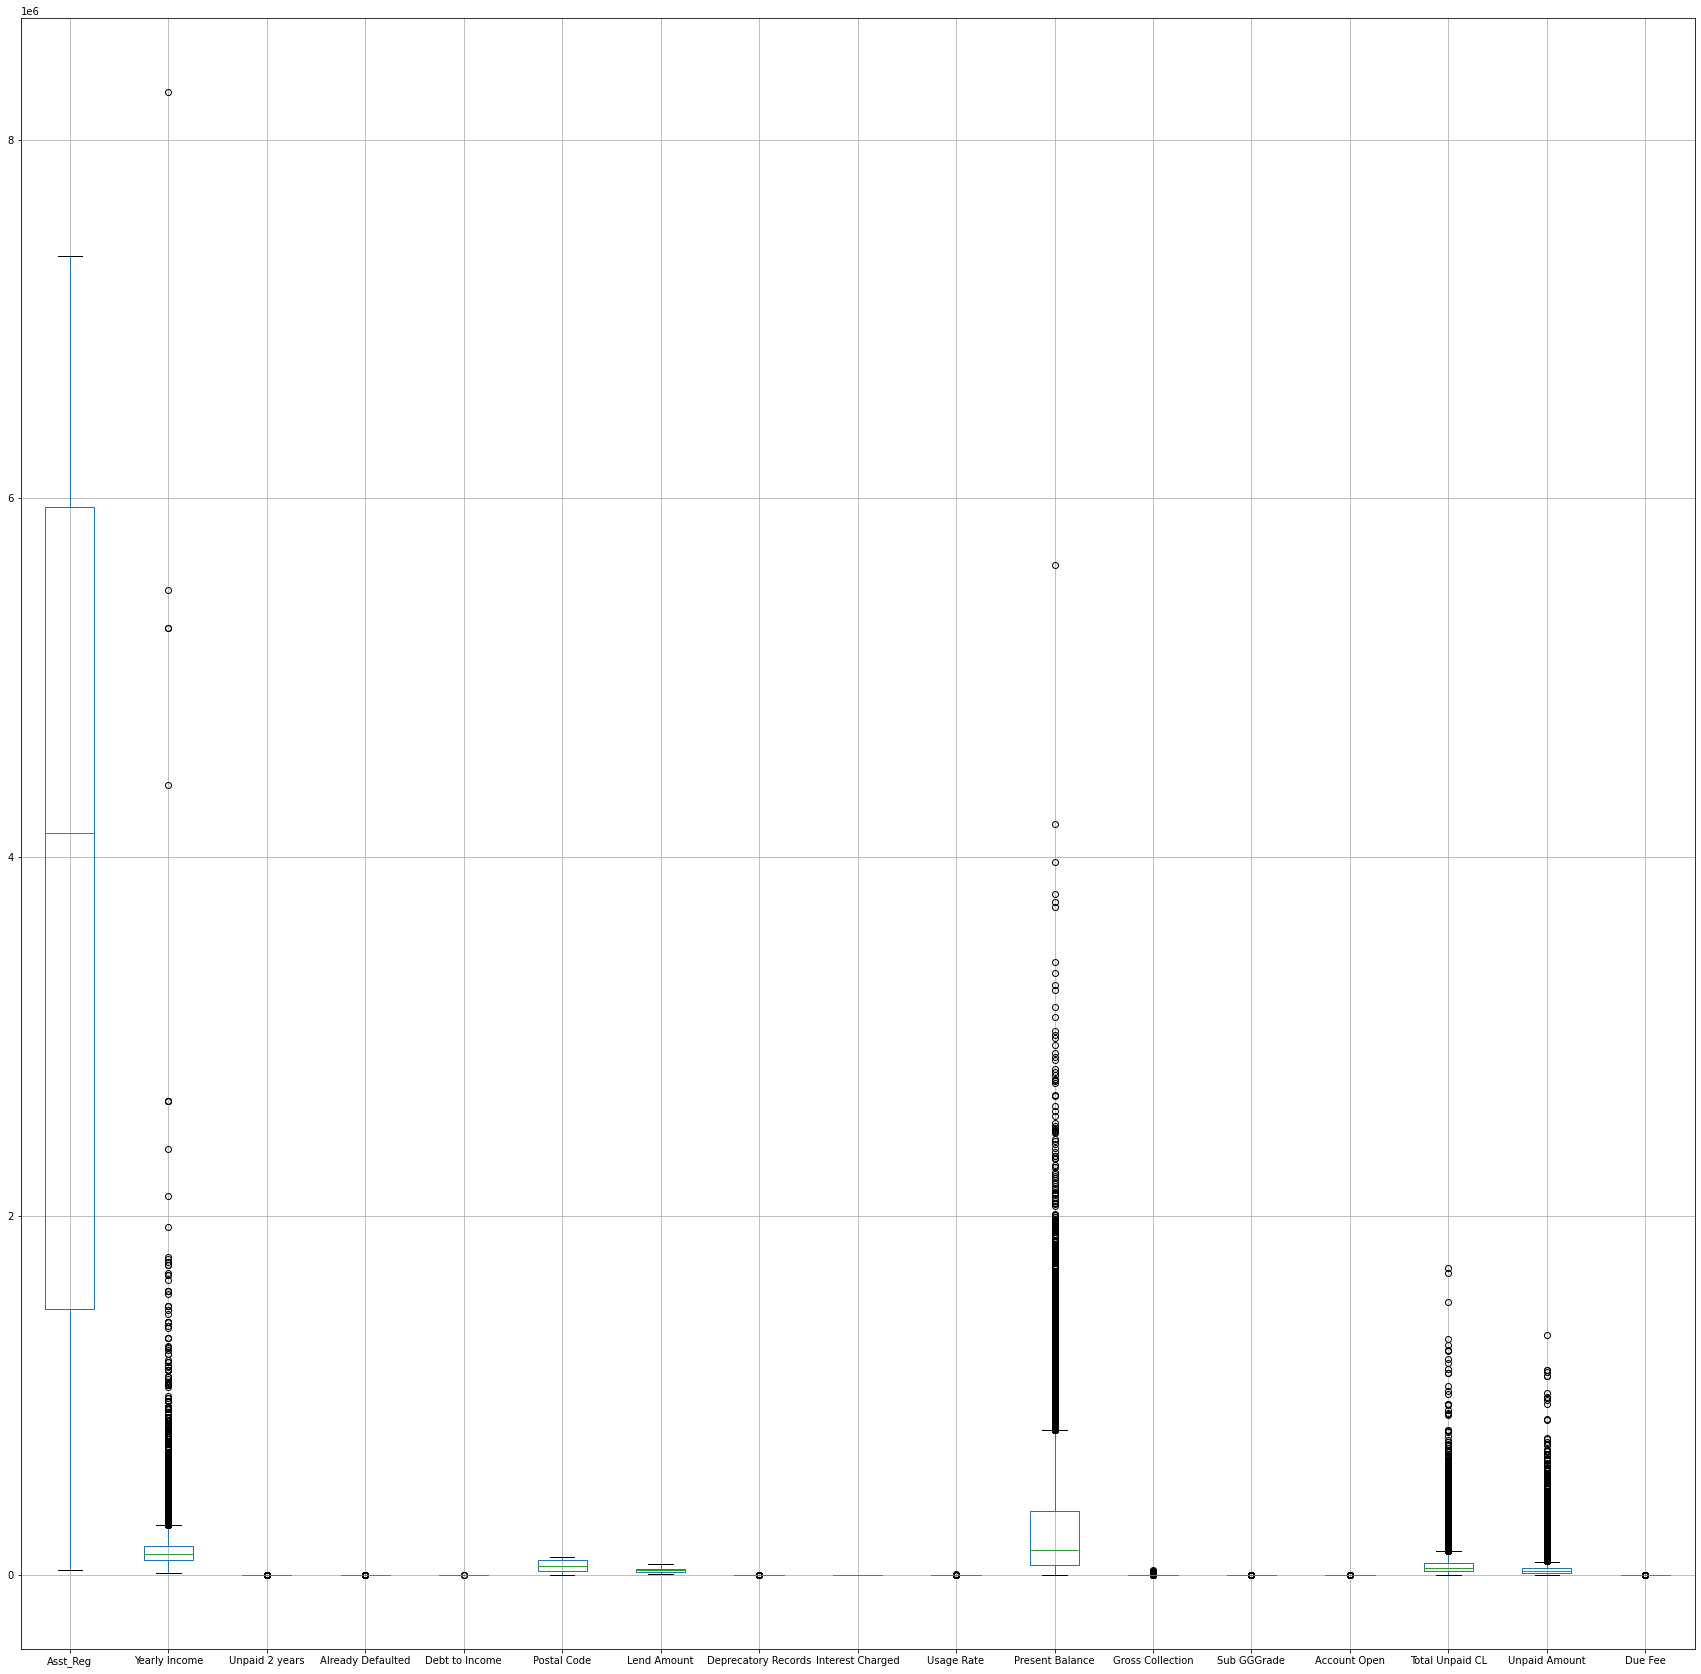

In [126]:
plt.figure(figsize=[30,30])
xtrain_num.boxplot()

In [125]:
xtrain_num.columns

Index(['Asst_Reg', 'Yearly Income', 'Unpaid 2 years', 'Already Defaulted',
       'Debt to Income', 'Postal Code', 'Lend Amount', 'Deprecatory Records',
       'Interest Charged', 'Usage Rate', 'Present Balance', 'Gross Collection',
       'Sub GGGrade', 'Account Open', 'Total Unpaid CL', 'Unpaid Amount',
       'Due Fee'],
      dtype='object')

In [145]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
trans=pt.fit_transform(xtrain_num_scaled)
trans_test=pt.fit_transform(test_num_scaled)

In [146]:
trans.shape

(87500, 18)

In [148]:
trans_num=pd.DataFrame(trans,columns=xtrain_num_scaled.columns)
trans_num_test=pd.DataFrame(trans_test,columns=test_num_scaled.columns)

In [138]:
trans_num.columns

Index(['Asst_Reg', 'Yearly Income', 'Unpaid 2 years', 'Already Defaulted',
       'Debt to Income', 'Postal Code', 'Lend Amount', 'Deprecatory Records',
       'Interest Charged', 'Usage Rate', 'Present Balance', 'Gross Collection',
       'Sub GGGrade', 'Account Open', 'Total Unpaid CL', 'Unpaid Amount',
       'Due Fee'],
      dtype='object')

In [149]:
xtrain_dummy=pd.DataFrame(pd.get_dummies(xtrain_cat,drop_first=True)).reset_index(drop=True)
test_dummy=pd.DataFrame(pd.get_dummies(test_cat,drop_first=True)).reset_index(drop=True)

In [151]:
xtrain_final2=pd.concat([trans_num,xtrain_dummy],axis=1)
test_final2=pd.concat([trans_num_test,test_dummy],axis=1)

In [155]:
y2=train['Loan/No Loan']
x2=xtrain_final2
lr_output(x2,y2)

confusion_matrix_test 
 [[12621  5073]
 [  887  3294]] 

classification_report_test 
               precision    recall  f1-score   support

           0       0.93      0.71      0.81     17694
           1       0.39      0.79      0.53      4181

    accuracy                           0.73     21875
   macro avg       0.66      0.75      0.67     21875
weighted avg       0.83      0.73      0.75     21875
 

confusion_matrix_train 
 [[38202 15092]
 [ 2521  9810]] 

classification_report_train 
               precision    recall  f1-score   support

           0       0.94      0.72      0.81     53294
           1       0.39      0.80      0.53     12331

    accuracy                           0.73     65625
   macro avg       0.67      0.76      0.67     65625
weighted avg       0.84      0.73      0.76     65625
 

roc_auc_score_train 
 roc_auc_score 0.7561860339480702 

roc_auc_score_test 
 roc_auc_score 0.7505712191363844 



In [222]:
test_final2.shape

(37500, 51)

In [223]:
xtrain_final2.shape

(87500, 51)

In [224]:
lr2=LogisticRegression()
lr2.fit(x2, y2)
y_pred2=lr2.predict(test_final2)

In [225]:
sub2=pd.read_csv('~/Documents/hackathon/Sample_Submission.csv')
sub2['Loan/No Loan']=y_pred2
sub2.to_csv('sub2.csv',index=False)

# Iteration3

In [156]:
xtrain_final2.columns

Index(['Asst_Reg', 'Yearly Income', 'Unpaid 2 years', 'Already Defaulted',
       'Debt to Income', 'Postal Code', 'Lend Amount', 'Deprecatory Records',
       'Interest Charged', 'Usage Rate', 'Present Balance', 'Gross Collection',
       'Sub GGGrade', 'Account Open', 'Total Unpaid CL', 'Unpaid Amount',
       'Due Fee', 'emi to monthly income', 'GGGrade_II', 'GGGrade_III',
       'GGGrade_IV', 'GGGrade_V', 'GGGrade_VI', 'GGGrade_VII',
       'Experience_4-6', 'Experience_7-9', 'Experience_>10',
       'Validation_Source Verified', 'Home Status_NONE', 'Home Status_OTHER',
       'Home Status_OWN', 'Home Status_RENT', 'Inquiries_no queries',
       'File Status_whole', 'State_NORTH_EAST', 'State_SOUTH', 'State_WEST',
       'Duration_5 years', 'Reason_credit  card', 'Reason_debt  consolidation',
       'Reason_home  improvement', 'Reason_house', 'Reason_major  purchase',
       'Reason_medical', 'Reason_moving', 'Reason_other',
       'Reason_renewable  energy', 'Reason_small  busines

In [157]:
xtrain_final2.columns

Index(['Asst_Reg', 'Yearly Income', 'Unpaid 2 years', 'Already Defaulted',
       'Debt to Income', 'Postal Code', 'Lend Amount', 'Deprecatory Records',
       'Interest Charged', 'Usage Rate', 'Present Balance', 'Gross Collection',
       'Sub GGGrade', 'Account Open', 'Total Unpaid CL', 'Unpaid Amount',
       'Due Fee', 'emi to monthly income', 'GGGrade_II', 'GGGrade_III',
       'GGGrade_IV', 'GGGrade_V', 'GGGrade_VI', 'GGGrade_VII',
       'Experience_4-6', 'Experience_7-9', 'Experience_>10',
       'Validation_Source Verified', 'Home Status_NONE', 'Home Status_OTHER',
       'Home Status_OWN', 'Home Status_RENT', 'Inquiries_no queries',
       'File Status_whole', 'State_NORTH_EAST', 'State_SOUTH', 'State_WEST',
       'Duration_5 years', 'Reason_credit  card', 'Reason_debt  consolidation',
       'Reason_home  improvement', 'Reason_house', 'Reason_major  purchase',
       'Reason_medical', 'Reason_moving', 'Reason_other',
       'Reason_renewable  energy', 'Reason_small  busines

In [159]:
#Lets check outliers

<AxesSubplot:>

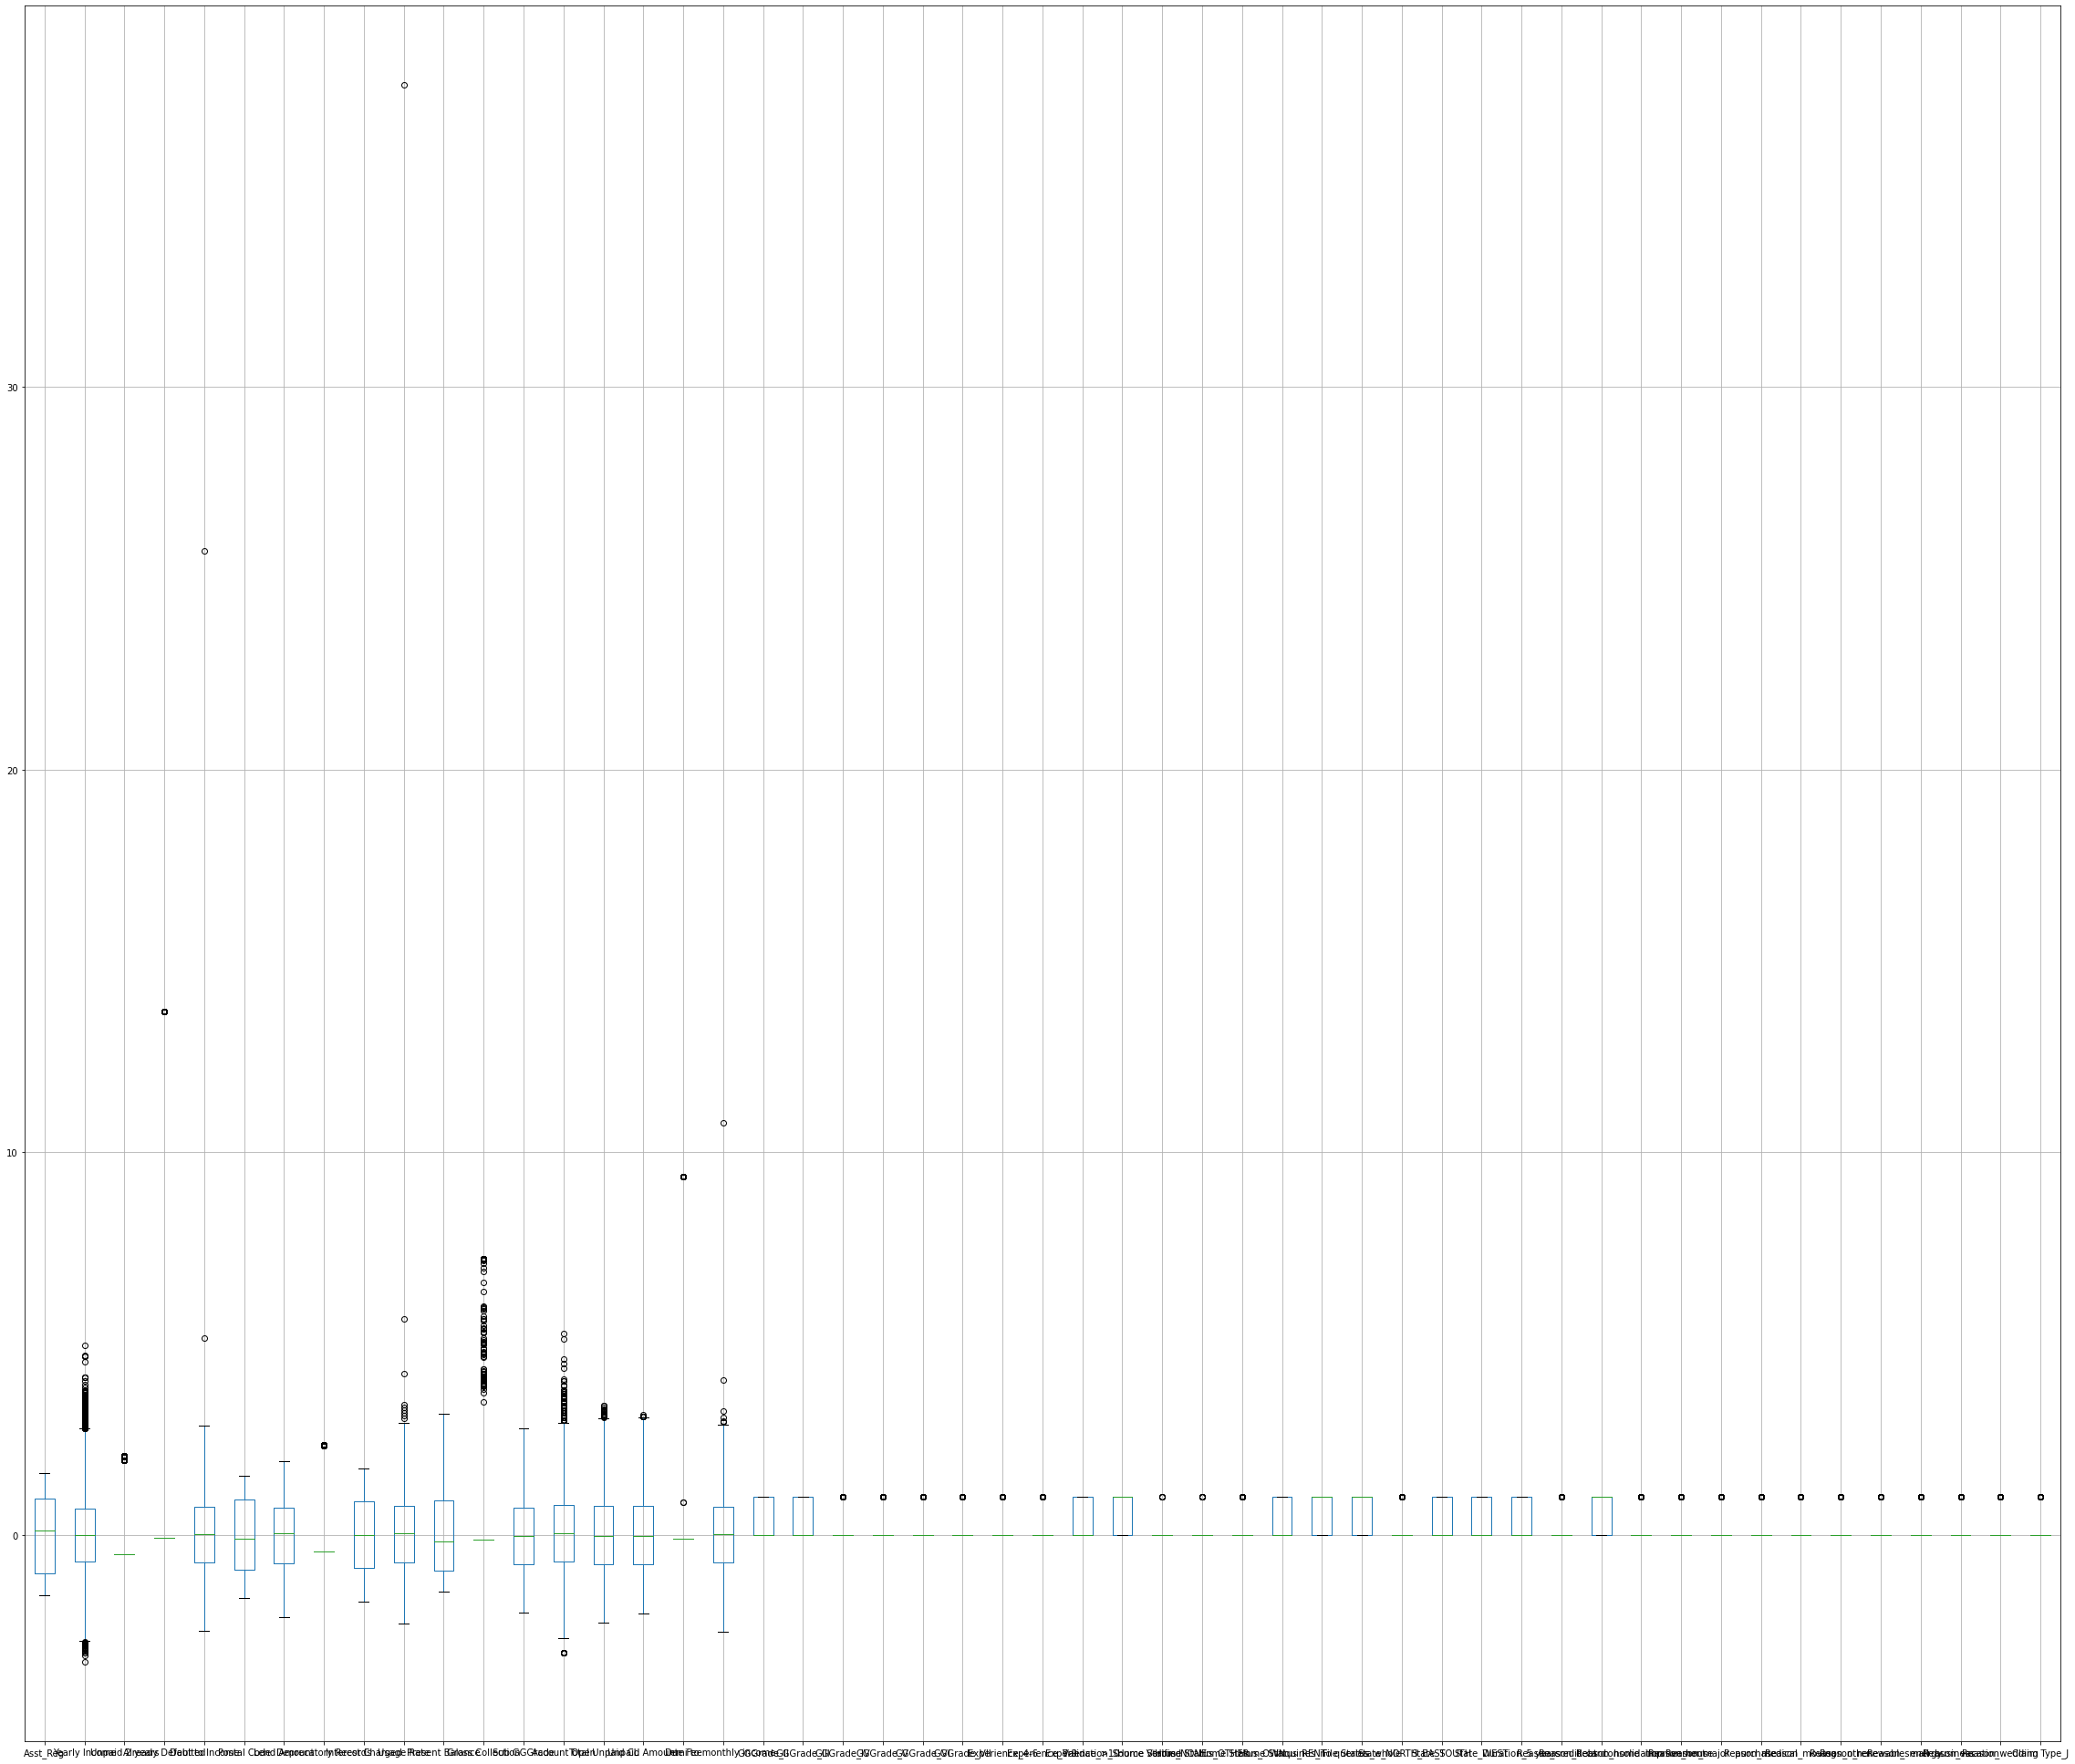

In [161]:
plt.figure(figsize=[40,35])
xtrain_final2.boxplot()

In [162]:
#We still have extreme outliers in the data

In [163]:
#We need to treat these outliers

In [164]:
#Lets try removing these outliers

Index(['Asst_Reg', 'Yearly Income', 'Unpaid 2 years', 'Already Defaulted',
       'Debt to Income', 'Postal Code', 'Lend Amount', 'Deprecatory Records',
       'Interest Charged', 'Usage Rate', 'Present Balance', 'Gross Collection',
       'Sub GGGrade', 'Account Open', 'Total Unpaid CL', 'Unpaid Amount',
       'Due Fee', 'emi to monthly income', 'GGGrade_II', 'GGGrade_III',
       'GGGrade_IV', 'GGGrade_V', 'GGGrade_VI', 'GGGrade_VII',
       'Experience_4-6', 'Experience_7-9', 'Experience_>10',
       'Validation_Source Verified', 'Home Status_NONE', 'Home Status_OTHER',
       'Home Status_OWN', 'Home Status_RENT', 'Inquiries_no queries',
       'File Status_whole', 'State_NORTH_EAST', 'State_SOUTH', 'State_WEST',
       'Duration_5 years', 'Reason_credit  card', 'Reason_debt  consolidation',
       'Reason_home  improvement', 'Reason_house', 'Reason_major  purchase',
       'Reason_medical', 'Reason_moving', 'Reason_other',
       'Reason_renewable  energy', 'Reason_small  busines

In [166]:
for i in trans_num.columns:
    print(i,len(trans_num[i].unique()))

Asst_Reg 83966
Yearly Income 9336
Unpaid 2 years 18
Already Defaulted 2
Debt to Income 6684
Postal Code 865
Lend Amount 1298
Deprecatory Records 18
Interest Charged 1701
Usage Rate 1088
Present Balance 73819
Gross Collection 391
Sub GGGrade 35
Account Open 59
Total Unpaid CL 6321
Unpaid Amount 38734
Due Fee 4
emi to monthly income 85643


In [168]:
for i in ['Already Defaulted','Unpaid 2 years','Deprecatory Records','Due Fee']:
       print(i,'\n',trans_num[i].unique())

Already Defaulted 
 [-0.07309363 13.6810834 ]
Unpaid 2 years 
 [-0.50403159  2.06415581  2.04303213  1.94719937  2.05933717  2.0680095
  2.06604778  2.06693275  2.0673991   2.06783155  2.06805948  2.06766708
  2.06793786  2.06817798  2.06815681  2.06814162  2.06809536  2.06812177]
Deprecatory Records 
 [-0.43035091  2.3205997   2.33809305  2.33997348  2.33989028  2.33960006
  2.3400168   2.3400038   2.34002634  2.34002305  2.3400282   2.34002999
  2.34003154  2.3400293   2.34003044  2.34003108  2.34003143  2.34003094]
Due Fee 
 [-0.10683267  9.36219139  0.85977443  9.36128309]


In [193]:
trans_num2=trans_num.copy()
trans_num2['loan']=train['Loan/No Loan']
trans_num2[['Already Defaulted','Due Fee','loan']]=trans_num2[['Already Defaulted','Due Fee','loan']].astype('object')
trans_num_test2=trans_num_test.copy()
trans_num_test2[['Already Defaulted','Due Fee']]=trans_num_test2[['Already Defaulted','Due Fee']].astype('object')

In [171]:
#Now its good to treat outliers

In [194]:
trans_num2.reset_index(drop=True,inplace=True)



In [181]:
xtrain_cat.reset_index(drop=True,inplace=True)

In [195]:
new=pd.concat([trans_num2,xtrain_cat],axis=1)

In [196]:
new.shape

(87500, 29)

In [198]:
q1=new.quantile(0.25)
q3=new.quantile(0.75)
iqr=q3-q1
ul=q3+1.5*iqr
ll=q1-1.5*iqr
wo=new[~((new>ul)|(new<ll)).any(axis=1)]

In [199]:
wo.shape

(56901, 29)

In [176]:
#Though there is huge data loss still lets proceed

In [205]:
wo['loan']=wo['loan'].astype('int')

In [206]:
target=wo['loan']

In [207]:
wo.drop('loan',axis=1,inplace=True)

In [208]:
xtrain_final3=pd.get_dummies(wo,drop_first=True)

In [209]:
xtrain_final3.shape

(56901, 51)

In [210]:
y3 = target
x3 = xtrain_final3
lr_output(x3,y3)

confusion_matrix_test 
 [[8060 3322]
 [ 580 2264]] 

classification_report_test 
               precision    recall  f1-score   support

           0       0.93      0.71      0.81     11382
           1       0.41      0.80      0.54      2844

    accuracy                           0.73     14226
   macro avg       0.67      0.75      0.67     14226
weighted avg       0.83      0.73      0.75     14226
 

confusion_matrix_train 
 [[24028 10057]
 [ 1798  6792]] 

classification_report_train 
               precision    recall  f1-score   support

           0       0.93      0.70      0.80     34085
           1       0.40      0.79      0.53      8590

    accuracy                           0.72     42675
   macro avg       0.67      0.75      0.67     42675
weighted avg       0.82      0.72      0.75     42675
 

roc_auc_score_train 
 roc_auc_score 0.747815184356441 

roc_auc_score_test 
 roc_auc_score 0.7520987687272894 



In [212]:
test_dummy3=pd.DataFrame(pd.get_dummies(test_cat,drop_first=True)).reset_index(drop=True)
test_final3=pd.concat([trans_num_test2,test_dummy3],axis=1)

In [213]:
test_final3.shape

(37500, 51)

In [215]:
lr3=LogisticRegression()
lr3.fit(x3, y3)
y_pred3=lr3.predict(test_final3)

In [216]:
sub_out=pd.read_csv('~/Documents/hackathon/Sample_Submission.csv')

In [221]:
sub_out['Loan/No Loan']=y_pred3
sub_out.to_csv('sub_out.csv',index=False)

# Iteration4

In [ ]:
tuning_params={'criterion':['gini','entropy'],'class_weight':['balanced'],'max_depth':list(np.arange(4,10,2)),
    'min_samples_split':list(np.arange(500,1200,50)),
    'max_features':list(np.arange(5,60,5))}

In [ ]:
GRID_MOD=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=tuning_params,scoring=make_scorer(f1_score),cv=5)

In [ ]:
GRID_MOD.fit(xtrain_final,ytrain)

In [ ]:
GRID_MOD.best_params_

In [227]:
dtree=DecisionTreeClassifier(class_weight='balanced',criterion='entropy',max_depth=8,max_features=35,min_samples_split=850)

In [228]:
dtree.fit(x3, y3)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=8, max_features=35, min_samples_split=850)

In [230]:
dtree.score(x3, y3)

0.7320960967294072

In [231]:
ypred_test_dt = dtree.predict(test_final3)

In [232]:
ypred_test_dt

array([1, 0, 1, ..., 1, 1, 1])

In [233]:
sub4=pd.read_csv('Sample_Submission.csv')

In [234]:
sub4['Loan/No Loan']=ypred_test_dt

In [235]:
sub4.to_csv('sub4.csv',index=False)

# Iteration5

In [236]:
dtree2=DecisionTreeClassifier(class_weight='balanced',criterion='entropy',max_depth=8,max_features=35,min_samples_split=850)

In [238]:

dtree2.fit(x2, y2)
y_pred5=dtree2.predict(test_final2)

In [239]:
sub5=pd.read_csv('Sample_Submission.csv')
sub5['Loan/No Loan']=y_pred5
sub5.to_csv('sub5.csv',index=False)

In [240]:
rfc_output(x2,y2)

confusion_matrix_test 
 [[17336   358]
 [ 3296   885]] 

classification_report_test 
               precision    recall  f1-score   support

           0       0.84      0.98      0.90     17694
           1       0.71      0.21      0.33      4181

    accuracy                           0.83     21875
   macro avg       0.78      0.60      0.62     21875
weighted avg       0.82      0.83      0.79     21875
 

confusion_matrix_train 
 [[53294     0]
 [    0 12331]] 

classification_report_train 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     53294
           1       1.00      1.00      1.00     12331

    accuracy                           1.00     65625
   macro avg       1.00      1.00      1.00     65625
weighted avg       1.00      1.00      1.00     65625
 

roc_auc_score_train 
 roc_auc_score 1.0 

roc_auc_score_test 
 roc_auc_score 0.5957195007735614 



# Iteration 6

In [241]:
#Lets try to clip for logistic

In [242]:
xtrain_imp.reset_index(drop=True,inplace=True)
test_imp.reset_index(drop=True,inplace=True)

In [243]:
xtrain_final=pd.concat([xtrain_imp,xtrain_dummy],axis=1)
test_final=pd.concat([test_imp,test_dummy],axis=1)

In [244]:
xtrain_final.shape,test_final.shape

((87500, 51), (37500, 51))

In [245]:
#lets make function for decision_tree classifier

In [248]:
x5=xtrain_final
y5=train['Loan/No Loan']

In [251]:
from sklearn.model_selection import cross_validate

In [254]:
def dt_output(x,y):
    
    dt=DecisionTreeClassifier(class_weight='balanced',criterion='entropy',max_depth=8,max_features=35,min_samples_split=850)
    
    
    output_cross=cross_validate(estimator=dt,X=x,y=y,cv=8,scoring='f1',return_train_score=True)
    output_cross_df=pd.DataFrame({'Train_score':output_cross['train_score'],'Test_score':output_cross['test_score']})
    print('train_mean',output_cross_df['Train_score'].mean())
    print('train_std',output_cross_df['Train_score'].std())
    print('test_mean',output_cross_df['Test_score'].mean())
    print('test_std',output_cross_df['Test_score'].std())
    
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=2,test_size=0.25)
    xtrain_final=xtrain
    xtest_final=xtest
  
    dt.fit(xtrain_final, ytrain)
    y_pred=dt.predict(xtest_final)
    pred_train=dt.predict(xtrain_final)
    print('confusion_matrix_test','\n',confusion_matrix(ytest,y_pred),'\n')
    print('classification_report_test','\n',classification_report(ytest,y_pred),'\n')
    print('confusion_matrix_train','\n',confusion_matrix(ytrain,pred_train),'\n')
    print('classification_report_train','\n',classification_report(ytrain,pred_train),'\n')
    print('roc_auc_score_train','\n','roc_auc_score',roc_auc_score(ytrain,pred_train),'\n')
    print('roc_auc_score_test','\n','roc_auc_score',roc_auc_score(ytest,y_pred),'\n')

In [255]:
dt_output(x5,y5)

train_mean 0.5216299553750268
train_std 0.004468092310460845
test_mean 0.5121387360234463
test_std 0.008103521241700282
confusion_matrix_test 
 [[12768  4926]
 [ 1034  3147]] 

classification_report_test 
               precision    recall  f1-score   support

           0       0.93      0.72      0.81     17694
           1       0.39      0.75      0.51      4181

    accuracy                           0.73     21875
   macro avg       0.66      0.74      0.66     21875
weighted avg       0.82      0.73      0.75     21875
 

confusion_matrix_train 
 [[38849 14445]
 [ 2759  9572]] 

classification_report_train 
               precision    recall  f1-score   support

           0       0.93      0.73      0.82     53294
           1       0.40      0.78      0.53     12331

    accuracy                           0.74     65625
   macro avg       0.67      0.75      0.67     65625
weighted avg       0.83      0.74      0.76     65625
 

roc_auc_score_train 
 roc_auc_score 0.7526056612

In [ ]:
    x=xtrain_final
    y=ytrain
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=2,test_size=0.25)
    
  
    dtree.fit(xtrain, ytrain)
    y_pred=dtree.predict(xtest)
    pred_train=dtree.predict(xtrain)
    print('confusion_matrix_test','\n',confusion_matrix(ytest,y_pred),'\n')
    print('classification_report_test','\n',classification_report(ytest,y_pred),'\n')
    print('confusion_matrix_train','\n',confusion_matrix(ytrain,pred_train),'\n')
    print('classification_report_train','\n',classification_report(ytrain,pred_train),'\n')
    print('roc_auc_score_train','\n','roc_auc_score',roc_auc_score(ytrain,pred_train),'\n')
    print('roc_auc_score_test','\n','roc_auc_score',roc_auc_score(ytest,y_pred),'\n')

In [ ]:
output_cross=cross_validate(estimator=dtree,X=x,y=y,cv=8,scoring='f1',return_train_score=True)
output_cross_df=pd.DataFrame({'Train_score':output_cross['train_score'],'Test_score':output_cross['test_score']})

# Iteration 7

In [260]:
#Lets do it with new set of variables

In [261]:
dtree=DecisionTreeClassifier(class_weight='balanced',criterion='entropy',max_depth=8,max_features=35,min_samples_split=850)
y=train['Loan/No Loan']
dtree.fit(xtrain_final, y)
dtree.score(xtrain_final, y)


0.7255657142857143

In [263]:
dt_output(xtrain_final,y)

train_mean 0.5220930908861547
train_std 0.0037467439366194026
test_mean 0.5124691628136362
test_std 0.0060167638506741904
confusion_matrix_test 
 [[12469  5225]
 [  928  3253]] 

classification_report_test 
               precision    recall  f1-score   support

           0       0.93      0.70      0.80     17694
           1       0.38      0.78      0.51      4181

    accuracy                           0.72     21875
   macro avg       0.66      0.74      0.66     21875
weighted avg       0.83      0.72      0.75     21875
 

confusion_matrix_train 
 [[37990 15304]
 [ 2563  9768]] 

classification_report_train 
               precision    recall  f1-score   support

           0       0.94      0.71      0.81     53294
           1       0.39      0.79      0.52     12331

    accuracy                           0.73     65625
   macro avg       0.66      0.75      0.67     65625
weighted avg       0.83      0.73      0.76     65625
 

roc_auc_score_train 
 roc_auc_score 0.75249404

In [264]:
x=xtrain_final
y=y
lr_output(x,y)

confusion_matrix_test 
 [[12646  5048]
 [  921  3260]] 

classification_report_test 
               precision    recall  f1-score   support

           0       0.93      0.71      0.81     17694
           1       0.39      0.78      0.52      4181

    accuracy                           0.73     21875
   macro avg       0.66      0.75      0.67     21875
weighted avg       0.83      0.73      0.75     21875
 

confusion_matrix_train 
 [[38350 14944]
 [ 2603  9728]] 

classification_report_train 
               precision    recall  f1-score   support

           0       0.94      0.72      0.81     53294
           1       0.39      0.79      0.53     12331

    accuracy                           0.73     65625
   macro avg       0.67      0.75      0.67     65625
weighted avg       0.83      0.73      0.76     65625
 

roc_auc_score_train 
 roc_auc_score 0.7542496046149906 

roc_auc_score_test 
 roc_auc_score 0.7472116603860679 



In [266]:
xtrain_final.shape

(87500, 51)

In [265]:
#logistic

In [267]:
def lr_output_changed(x,y):
   
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=2,test_size=0.25)
    xtrain_final=xtrain.drop('emi to monthly income',axis=1)
    xtest_final=xtest.drop('emi to monthly income',axis=1)
    lr=LogisticRegression(class_weight='balanced',penalty='l1',solver='liblinear')
    lr.fit(xtrain_final, ytrain)
    y_pred=lr.predict(xtest_final)
    pred_train=lr.predict(xtrain_final)
    print('confusion_matrix_test','\n',confusion_matrix(ytest,y_pred),'\n')
    print('classification_report_test','\n',classification_report(ytest,y_pred),'\n')
    print('confusion_matrix_train','\n',confusion_matrix(ytrain,pred_train),'\n')
    print('classification_report_train','\n',classification_report(ytrain,pred_train),'\n')
    print('roc_auc_score_train','\n','roc_auc_score',roc_auc_score(ytrain,pred_train),'\n')
    print('roc_auc_score_test','\n','roc_auc_score',roc_auc_score(ytest,y_pred),'\n')

In [268]:
lr_output_changed(x,y)

confusion_matrix_test 
 [[12646  5048]
 [  924  3257]] 

classification_report_test 
               precision    recall  f1-score   support

           0       0.93      0.71      0.81     17694
           1       0.39      0.78      0.52      4181

    accuracy                           0.73     21875
   macro avg       0.66      0.75      0.67     21875
weighted avg       0.83      0.73      0.75     21875
 

confusion_matrix_train 
 [[38345 14949]
 [ 2598  9733]] 

classification_report_train 
               precision    recall  f1-score   support

           0       0.94      0.72      0.81     53294
           1       0.39      0.79      0.53     12331

    accuracy                           0.73     65625
   macro avg       0.67      0.75      0.67     65625
weighted avg       0.83      0.73      0.76     65625
 

roc_auc_score_train 
 roc_auc_score 0.7544054360782829 

roc_auc_score_test 
 roc_auc_score 0.7468528945405762 



In [315]:
x=xtrain_final


In [316]:
y=train['Loan/No Loan']

In [317]:
x.shape

(87500, 50)

In [318]:
y.shape

(87500,)

In [319]:
xtest_final.shape

(21875, 50)

In [320]:
from sklearn.linear_model import LogisticRegression
lr_fit=LogisticRegression(class_weight='balanced',penalty='l1',solver='liblinear')
predf=lr_fit.fit(x,y).predict(test_final)

In [330]:
test_final.columns

Index(['Asst_Reg', 'Yearly Income', 'Unpaid 2 years', 'Already Defaulted',
       'Debt to Income', 'Postal Code', 'Lend Amount', 'Deprecatory Records',
       'Interest Charged', 'Usage Rate', 'Present Balance', 'Gross Collection',
       'Sub GGGrade', 'Account Open', 'Total Unpaid CL', 'Unpaid Amount',
       'Due Fee', 'emi to monthly income', 'GGGrade_II', 'GGGrade_III',
       'GGGrade_IV', 'GGGrade_V', 'GGGrade_VI', 'GGGrade_VII',
       'Experience_4-6', 'Experience_7-9', 'Experience_>10',
       'Validation_Source Verified', 'Home Status_NONE', 'Home Status_OTHER',
       'Home Status_OWN', 'Home Status_RENT', 'Inquiries_no queries',
       'File Status_whole', 'State_NORTH_EAST', 'State_SOUTH', 'State_WEST',
       'Duration_5 years', 'Reason_credit  card', 'Reason_debt  consolidation',
       'Reason_home  improvement', 'Reason_house', 'Reason_major  purchase',
       'Reason_medical', 'Reason_moving', 'Reason_other',
       'Reason_renewable  energy', 'Reason_small  busines

In [331]:
test_final.drop('emi to monthly income',axis=1,inplace=True)

In [332]:
predf=lr_fit.predict(test_final)

In [333]:
predf.shape

(37500,)

In [334]:
sub6=pd.read_csv('Sample_Submission.csv')
sub6['Loan/No Loan']=predf
sub6.to_csv('sub6.csv',index=False)

In [335]:
#logistic

In [338]:
x.shape,test_final.shape

((87500, 50), (37500, 50))

In [340]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
train_trans=pt.fit_transform(x)
test_trans=pt.fit_transform(test_final)

In [342]:
train_trans_df=pd.DataFrame(train_trans,columns=x.columns)

In [343]:
test_trans_df=pd.DataFrame(test_trans,columns=test_final.columns)

In [344]:
lr_fit2=LogisticRegression(class_weight='balanced',penalty='l1',solver='liblinear')
predf2=lr_fit.fit(train_trans_df,y).predict(test_trans_df)

In [346]:
sub7=pd.read_csv('Sample_Submission.csv')
sub7['Loan/No Loan']=predf2
sub7.to_csv('sub7.csv',index=False)

# Iteration8

In [354]:
train_trans_df['emi_ratio']=EMI_TRAIN
test_trans_df['emi_ratio']=EMI_TEST

In [355]:
train_trans_df.shape

(87500, 51)

In [356]:
test_trans_df.shape

(37500, 51)

In [357]:
lr_fit3=LogisticRegression(class_weight='balanced',penalty='l1',solver='liblinear')
predf3=lr_fit3.fit(train_trans_df,y).predict(test_trans_df)

In [358]:
sub8=pd.read_csv('Sample_Submission.csv')
sub8['Loan/No Loan']=predf3
sub8.to_csv('sub8.csv',index=False)

# Iteration9 

In [360]:
#lets do something with state columns

In [361]:
train.shape

(87500, 30)

In [364]:
train.columns

Index(['ID', 'Asst_Reg', 'GGGrade', 'Experience', 'Validation',
       'Yearly Income', 'Home Status', 'Unpaid 2 years', 'Already Defaulted',
       'Designation', 'Debt to Income', 'Postal Code', 'Lend Amount',
       'Deprecatory Records', 'Interest Charged', 'Usage Rate', 'Inquiries',
       'Present Balance', 'Gross Collection', 'Sub GGGrade', 'File Status',
       'State', 'Account Open', 'Total Unpaid CL', 'Duration', 'Unpaid Amount',
       'Reason', 'Claim Type', 'Due Fee', 'Loan/No Loan'],
      dtype='object')

In [373]:
train_trans_df.shape

(87500, 51)

In [374]:
test_trans_df.shape

(37500, 51)

In [375]:
train_new=train_trans_df.copy()
test_new=test_trans_df.copy()

In [378]:
train_new.shape

(87500, 51)

In [399]:
train_new['state2']=train.State

In [400]:
test_new['state2']=test.State

In [402]:
def func(x):
    if x in ['NE','MS','ND','ME']:
        return 'poor_states'
    elif x in ['OR','WA','AZ','UT','NV','HI','DC']:
        return 'excellent_states'
    else:
        return 'good_states'

In [401]:
train_new.columns

Index(['Asst_Reg', 'Yearly Income', 'Unpaid 2 years', 'Already Defaulted',
       'Debt to Income', 'Postal Code', 'Lend Amount', 'Deprecatory Records',
       'Interest Charged', 'Usage Rate', 'Present Balance', 'Gross Collection',
       'Sub GGGrade', 'Account Open', 'Total Unpaid CL', 'Unpaid Amount',
       'Due Fee', 'GGGrade_II', 'GGGrade_III', 'GGGrade_IV', 'GGGrade_V',
       'GGGrade_VI', 'GGGrade_VII', 'Experience_4-6', 'Experience_7-9',
       'Experience_>10', 'Validation_Source Verified', 'Home Status_NONE',
       'Home Status_OTHER', 'Home Status_OWN', 'Home Status_RENT',
       'Inquiries_no queries', 'File Status_whole', 'State_NORTH_EAST',
       'State_SOUTH', 'State_WEST', 'Duration_5 years', 'Reason_credit  card',
       'Reason_debt  consolidation', 'Reason_home  improvement',
       'Reason_house', 'Reason_major  purchase', 'Reason_medical',
       'Reason_moving', 'Reason_other', 'Reason_renewable  energy',
       'Reason_small  business', 'Reason_vacation', 'R

In [403]:
train_new['state_type']=train_new['state2'].apply(func)
test_new['state_type']=test_new['state2'].apply(func)

In [405]:
train_new['state_type'].unique()

array(['good_states', 'excellent_states', 'poor_states'], dtype=object)

In [407]:
test_new['state_type'].unique()

array(['good_states'], dtype=object)

In [409]:
train_new.drop('state2',axis=1,inplace=True)
test_new.drop('state2',axis=1,inplace=True)

In [410]:
train_new_dum=pd.get_dummies(train_new,drop_first=True)
test_new_dum=pd.get_dummies(test_new,drop_first=True)

In [412]:
train_new_dum.shape,test_new_dum.shape

((87500, 53), (37500, 51))